# Climate Enthousiats


---

In [1]:
!conda activate PythonData
# Dependencies and Setup
## Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
from pathlib import Path
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# File to Load (Remember to Change These)
climate_change_data = Path("Resources/climate_change_data.csv")


# Read School and Student Data File and store into Pandas DataFrames
climate_change_data_pd = pd.read_csv(climate_change_data)
climate_change_data_df = pd.read_csv(climate_change_data)
climate_change_data_pd.columns


Index(['Date', 'Location', 'Country', 'Temperature', 'CO2 Emissions',
       'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed'],
      dtype='object')

In [2]:
# Have a look at the data
climate_change_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.2+ KB


In [3]:
# Changing Date columns Dtype from object to datetime
climate_change_data_pd['Date'] = pd.to_datetime(climate_change_data_pd['Date'])
climate_change_data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            10000 non-null  datetime64[ns]
 1   Location        10000 non-null  object        
 2   Country         10000 non-null  object        
 3   Temperature     10000 non-null  float64       
 4   CO2 Emissions   10000 non-null  float64       
 5   Sea Level Rise  10000 non-null  float64       
 6   Precipitation   10000 non-null  float64       
 7   Humidity        10000 non-null  float64       
 8   Wind Speed      10000 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 703.2+ KB


In [4]:
# Check N/A value 
climate_change_data_pd.isna().sum()

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

In [5]:
# From Date column Created  Year, Month columns
# climate_change_data_pd['Year_Month'] = climate_change_data_pd['Date'].dt.strftime('%Y-%m')
climate_change_data_pd['Year'] = climate_change_data_pd['Date'].dt.year
climate_change_data_pd['Month'] = climate_change_data_pd['Date'].dt.month

In [6]:
# Renaming columns headers & adding Year, Month & Year_Month columns
cleaned_Climate_data_df = climate_change_data_pd.rename(columns={"CO2 Emissions":"CO2_Emissions", "Sea Level Rise":"Sea_Level_Rise","Wind Speed":"Wind_Speed"})
cleaned_Climate_data_df.columns

Index(['Date', 'Location', 'Country', 'Temperature', 'CO2_Emissions',
       'Sea_Level_Rise', 'Precipitation', 'Humidity', 'Wind_Speed', 'Year',
       'Month'],
      dtype='object')

In [7]:
#drop Date/time column
cleaned_Climate_data_df = cleaned_Climate_data_df.drop(['Date'], axis=1)

In [8]:
# cleaned_Climate_data_df with Sorted columns & splited Year, Month & Year_Month columns
cleaned_Climate_data_df = cleaned_Climate_data_df[['Year','Month','Country','Location', 'Temperature','CO2_Emissions','Sea_Level_Rise','Precipitation','Humidity','Wind_Speed']]
cleaned_Climate_data_df

Year  Month                Country           Location  Temperature  \
0     2000      1                 Latvia    New Williamtown    10.688986   
1     2000      1           South Africa       North Rachel    13.814430   
2     2000      1          French Guiana   West Williamland    27.323718   
3     2000      1                Vietnam        South David    12.309581   
4     2000      1                Moldova     New Scottburgh    13.210885   
...    ...    ...                    ...                ...          ...   
9995  2022     12                 Bhutan   South Elaineberg    15.020523   
9996  2022     12                  Congo       Leblancville    16.772451   
9997  2022     12              Argentina     West Stephanie    22.370025   
9998  2022     12                Albania        Port Steven    19.430853   
9999  2022     12  Sao Tome and Principe  West Anthonyburgh    12.661928   

      CO2_Emissions  Sea_Level_Rise  Precipitation   Humidity  Wind_Speed  
0        403.118903        0.717506      13.835237  23.631256   18.492026  
1        396.663499        1.205715      40.974084  43.982946   34.249300  
2        451.553155       -0.160783      42.697931  96.652600   34.124261  
3        422.404983       -0.475931       5.193341  47.467938    8.554563  
4        410.472999        1.135757      78.695280  61.789672    8.001164  
...             ...             ...            ...        ...         ...  
9995     391.379537       -1.452243      93.417109  25.293814    6.531866  
9996     346.921190        0.543616      49.882947  96.787402   42.249014  
9997     466.042136        1.026704      30.659841  15.211825   18.293708  
9998     337.899776       -0.895329      18.932275  82.774520   42.424255  
9999     381.172746        2.260788      78.339658  99.243923   41.856539  

[10000 rows x 10 columns]

In [9]:
# Count of Countries & count of used times of each country
cleaned_Climate_data_df['Country'].value_counts()

Congo                        94
Korea                        76
Tanzania                     61
Armenia                      58
French Guiana                58
                             ..
Saint Pierre and Miquelon    28
Chile                        28
Dominican Republic           28
Syrian Arab Republic         27
Saint Kitts and Nevis        23
Name: Country, Length: 243, dtype: int64

In [10]:
# Count of Locations & count of used times of each Location
cleaned_Climate_data_df['Location'].value_counts()

North David          12
Lake James           11
New James            10
West John            10
Lake Michael         10
                     ..
South Corey           1
Madisonborough        1
Lake Matthewberg      1
North Williamton      1
West Anthonyburgh     1
Name: Location, Length: 7764, dtype: int64

In [11]:
# Summary of the data 
climate_change_summary_pd = climate_change_data_pd.describe()
climate_change_summary_pd

Temperature  CO2 Emissions  Sea Level Rise  Precipitation  \
count  10000.000000   10000.000000    10000.000000   10000.000000   
mean      14.936034     400.220469       -0.003152      49.881208   
std        5.030616      49.696933        0.991349      28.862417   
min       -3.803589     182.131220       -4.092155       0.010143   
25%       11.577991     367.109330       -0.673809      24.497516   
50%       14.981136     400.821324        0.002332      49.818967   
75%       18.305826     433.307905        0.675723      74.524991   
max       33.976956     582.899701        4.116559      99.991900   

           Humidity    Wind Speed          Year         Month  
count  10000.000000  10000.000000  10000.000000  10000.000000  
mean      49.771302     25.082066   2010.997900      6.523100  
std       28.929320     14.466648      6.633634      3.448718  
min        0.018998      0.001732   2000.000000      1.000000  
25%       24.713250     12.539733   2005.000000      4.000000  
50%       49.678412     24.910787   2011.000000      7.000000  
75%       75.206390     37.670260   2017.000000     10.000000  
max       99.959665     49.997664   2022.000000     12.000000

In [12]:
#Climate_data mean grouping

Climate_data_avg_Temperature = cleaned_Climate_data_df["Temperature"].mean()
Climate_data_avg_CO2_Emissions = cleaned_Climate_data_df["CO2_Emissions"].mean()
Climate_data_avg_Sea_Level_Rise = cleaned_Climate_data_df["Sea_Level_Rise"].mean()
Climate_data_avg_Precipitation = cleaned_Climate_data_df["Precipitation"].mean()
Climate_data_avg_Humidity = cleaned_Climate_data_df["Humidity"].mean()
Climate_data_avg_Wind_Speed = cleaned_Climate_data_df["Wind_Speed"].mean()

Climate_avg_data = pd.DataFrame({"Average Temperature" : [Climate_data_avg_Temperature],
                                 "Average CO2 Emissions" : [Climate_data_avg_CO2_Emissions],
                                 "Average Sea Level Rise" : [Climate_data_avg_Sea_Level_Rise],
                                 "Average Precipitation" : [Climate_data_avg_Precipitation],
                                 "Average Humidity" : [Climate_data_avg_Humidity],
                                 "Average Wind Speed" : [Climate_data_avg_Wind_Speed]})                               
Climate_avg_data

Average Temperature  Average CO2 Emissions  Average Sea Level Rise  \
0            14.936034             400.220469               -0.003152   

   Average Precipitation  Average Humidity  Average Wind Speed  
0              49.881208         49.771302           25.082066

In [13]:
# Min, Max, Mean Annual Temperature per Country
Yearly_country_temp = cleaned_Climate_data_df.groupby(['Year','Country'])['Temperature'].agg(['min','max','mean']).reset_index().round(2)
Yearly_country_temp

Year            Country    min    max   mean
0     2000        Afghanistan  10.32  22.17  16.25
1     2000            Albania  11.97  11.97  11.97
2     2000            Algeria   5.71  13.85  10.06
3     2000     American Samoa  10.91  16.08  13.49
4     2000            Andorra   6.45  14.11  10.28
...    ...                ...    ...    ...    ...
4671  2022  Wallis and Futuna   7.74  15.79  12.47
4672  2022     Western Sahara   9.88  15.85  13.19
4673  2022              Yemen  16.60  16.60  16.60
4674  2022             Zambia  14.19  21.78  17.20
4675  2022           Zimbabwe  16.68  16.68  16.68

[4676 rows x 5 columns]

In [14]:
# Min, Max, Mean Annual CO2_Emissions per Country
Yearly_country_CO2_Emissions = cleaned_Climate_data_df.groupby(['Year','Country'])['CO2_Emissions'].agg(['min','max','mean']).reset_index().round(2)
Yearly_country_CO2_Emissions

Year            Country     min     max    mean
0     2000        Afghanistan  428.22  476.69  452.45
1     2000            Albania  400.36  400.36  400.36
2     2000            Algeria  357.51  472.54  411.33
3     2000     American Samoa  377.15  411.88  394.51
4     2000            Andorra  415.03  440.56  427.79
...    ...                ...     ...     ...     ...
4671  2022  Wallis and Futuna  290.59  447.42  358.73
4672  2022     Western Sahara  352.60  506.13  417.00
4673  2022              Yemen  415.61  415.61  415.61
4674  2022             Zambia  304.42  431.38  378.39
4675  2022           Zimbabwe  442.48  442.48  442.48

[4676 rows x 5 columns]

In [15]:
# Min, Max, Mean Annual Sea_Level_Rise per Country
Yearly_country_Sea_Level_Rise = cleaned_Climate_data_df.groupby(['Year','Country'])['Sea_Level_Rise'].agg(['min','max','mean']).reset_index().round(2)
Yearly_country_Sea_Level_Rise

Year            Country   min   max  mean
0     2000        Afghanistan  0.26  1.49  0.88
1     2000            Albania  0.05  0.05  0.05
2     2000            Algeria -1.72 -0.16 -0.95
3     2000     American Samoa -0.22  0.27  0.03
4     2000            Andorra -0.30  0.70  0.20
...    ...                ...   ...   ...   ...
4671  2022  Wallis and Futuna -1.37  0.36 -0.73
4672  2022     Western Sahara -1.51 -0.80 -1.17
4673  2022              Yemen  2.40  2.40  2.40
4674  2022             Zambia -1.20  1.47  0.31
4675  2022           Zimbabwe -1.10 -1.10 -1.10

[4676 rows x 5 columns]

In [16]:
# Min, Max, Mean Annual Precipitation per Country
Yearly_country_Precipitation = cleaned_Climate_data_df.groupby(['Year','Country'])['Precipitation'].agg(['min','max','mean']).reset_index().round(2)
Yearly_country_Precipitation

Year            Country    min    max   mean
0     2000        Afghanistan  23.68  69.51  46.60
1     2000            Albania  44.36  44.36  44.36
2     2000            Algeria   6.57  87.71  41.16
3     2000     American Samoa  19.08  28.78  23.93
4     2000            Andorra  27.07  69.14  48.10
...    ...                ...    ...    ...    ...
4671  2022  Wallis and Futuna  14.40  94.84  66.49
4672  2022     Western Sahara  55.54  58.36  57.27
4673  2022              Yemen  78.00  78.00  78.00
4674  2022             Zambia   9.53  95.37  44.08
4675  2022           Zimbabwe  87.93  87.93  87.93

[4676 rows x 5 columns]

In [17]:
# Min, Max, Mean Annual Humidity per Country
Yearly_country_Humidity = cleaned_Climate_data_df.groupby(['Year','Country'])['Humidity'].agg(['min','max','mean']).reset_index().round(2)
Yearly_country_Humidity

Year            Country    min    max   mean
0     2000        Afghanistan  20.65  93.16  56.91
1     2000            Albania  31.55  31.55  31.55
2     2000            Algeria   1.67  32.76  14.34
3     2000     American Samoa  47.71  87.18  67.44
4     2000            Andorra   3.85  94.00  48.93
...    ...                ...    ...    ...    ...
4671  2022  Wallis and Futuna   6.69  79.38  53.12
4672  2022     Western Sahara  51.23  94.06  69.30
4673  2022              Yemen  22.15  22.15  22.15
4674  2022             Zambia  31.88  45.22  36.21
4675  2022           Zimbabwe   5.16   5.16   5.16

[4676 rows x 5 columns]

In [18]:
# Min, Max, Mean Annual Wind_Speed per Country
Yearly_country_Wind_Speed = cleaned_Climate_data_df.groupby(['Year','Country'])['Wind_Speed'].agg(['min','max','mean']).reset_index().round(2)
Yearly_country_Wind_Speed

Year            Country    min    max   mean
0     2000        Afghanistan  14.88  21.19  18.04
1     2000            Albania  24.14  24.14  24.14
2     2000            Algeria   0.97  38.69  11.32
3     2000     American Samoa  27.19  34.52  30.86
4     2000            Andorra  26.34  31.52  28.93
...    ...                ...    ...    ...    ...
4671  2022  Wallis and Futuna  14.43  30.09  21.96
4672  2022     Western Sahara  11.05  35.61  27.42
4673  2022              Yemen   0.09   0.09   0.09
4674  2022             Zambia   3.33  42.55  21.27
4675  2022           Zimbabwe  48.22  48.22  48.22

[4676 rows x 5 columns]

In [19]:
# Min, Max, Mean Temperature per Country
country_temp = cleaned_Climate_data_df.groupby('Country')['Temperature'].agg(['min','max','mean']).reset_index().round(2)
country_temp

Country   min    max   mean
0          Afghanistan  2.19  23.78  14.73
1              Albania  3.13  26.44  15.65
2              Algeria  5.71  27.55  14.50
3       American Samoa  7.49  26.17  15.90
4              Andorra  3.69  24.46  15.07
..                 ...   ...    ...    ...
238  Wallis and Futuna  1.21  24.89  14.83
239     Western Sahara  8.45  20.64  15.39
240              Yemen  2.82  23.75  15.14
241             Zambia  4.08  26.17  14.71
242           Zimbabwe  7.82  21.46  15.00

[243 rows x 4 columns]

In [20]:
# Min, Max, Mean CO2_Emissions per Country
country_CO2_Emissions = cleaned_Climate_data_df.groupby('Country')['CO2_Emissions'].agg(['min','max','mean']).reset_index().round(3)
country_CO2_Emissions

Country      min      max     mean
0          Afghanistan  282.226  576.499  403.030
1              Albania  309.998  529.387  403.087
2              Algeria  269.432  491.187  401.640
3       American Samoa  306.017  491.278  392.449
4              Andorra  274.167  489.733  410.239
..                 ...      ...      ...      ...
238  Wallis and Futuna  290.593  543.856  395.606
239     Western Sahara  294.279  506.129  384.047
240              Yemen  261.739  488.717  392.017
241             Zambia  264.780  509.768  395.452
242           Zimbabwe  347.059  532.409  414.445

[243 rows x 4 columns]

In [21]:
# Min, Max, Mean Sea_Level_Rise per Country
country_Sea_Level_Rise = cleaned_Climate_data_df.groupby('Country')['Sea_Level_Rise'].agg(['min','max','mean']).reset_index().round(2)
country_Sea_Level_Rise

Country   min   max  mean
0          Afghanistan -2.25  2.48  0.12
1              Albania -2.18  1.58 -0.25
2              Algeria -2.75  1.82 -0.34
3       American Samoa -1.53  1.73  0.16
4              Andorra -2.24  2.30 -0.03
..                 ...   ...   ...   ...
238  Wallis and Futuna -2.24  2.01 -0.01
239     Western Sahara -1.90  2.76  0.02
240              Yemen -2.12  2.40  0.10
241             Zambia -1.75  1.63 -0.23
242           Zimbabwe -1.67  2.72 -0.01

[243 rows x 4 columns]

In [22]:
# Min, Max, Mean Precipitation per Country
country_Precipitation = cleaned_Climate_data_df.groupby('Country')['Precipitation'].agg(['min','max','mean']).reset_index().round(2)
country_Precipitation

Country   min    max   mean
0          Afghanistan  2.68  97.28  47.15
1              Albania  0.15  99.39  56.27
2              Algeria  0.61  98.72  46.27
3       American Samoa  2.01  99.57  49.00
4              Andorra  0.04  98.78  50.30
..                 ...   ...    ...    ...
238  Wallis and Futuna  0.60  94.84  44.84
239     Western Sahara  3.85  97.74  56.08
240              Yemen  0.45  97.51  49.92
241             Zambia  0.17  98.01  44.02
242           Zimbabwe  7.30  99.91  56.34

[243 rows x 4 columns]

In [23]:
# Min, Max, Mean Humidity per Country
country_Humidity = cleaned_Climate_data_df.groupby('Country')['Humidity'].agg(['min','max','mean']).reset_index().round(2)
country_Humidity

Country   min    max   mean
0          Afghanistan  1.17  97.71  49.66
1              Albania  1.68  98.37  54.21
2              Algeria  0.53  96.51  48.24
3       American Samoa  5.01  96.44  53.65
4              Andorra  2.75  99.36  47.76
..                 ...   ...    ...    ...
238  Wallis and Futuna  0.86  96.48  43.90
239     Western Sahara  3.02  98.71  47.42
240              Yemen  0.58  98.55  47.42
241             Zambia  0.60  97.52  36.65
242           Zimbabwe  5.16  96.97  56.87

[243 rows x 4 columns]

In [24]:
# Min, Max, Mean Wind_Speed per Country
country_Wind_Speed = cleaned_Climate_data_df.groupby('Country')['Wind_Speed'].agg(['min','max','mean']).reset_index().round(2)
country_Wind_Speed

Country   min    max   mean
0          Afghanistan  0.98  48.99  23.86
1              Albania  1.31  49.22  25.88
2              Algeria  0.32  49.88  20.67
3       American Samoa  0.30  49.80  23.75
4              Andorra  0.89  46.90  23.27
..                 ...   ...    ...    ...
238  Wallis and Futuna  0.78  49.71  28.30
239     Western Sahara  0.94  49.51  27.93
240              Yemen  0.09  49.12  22.07
241             Zambia  2.55  48.54  24.49
242           Zimbabwe  0.16  49.24  27.14

[243 rows x 4 columns]

In [25]:
# Average Monthly Temprature
Avg_Monthly_Temp = pd.DataFrame(cleaned_Climate_data_df.groupby('Month')['Temperature'].mean().round(2))
Avg_Monthly_Temp

Temperature
Month             
1            14.82
2            15.17
3            14.86
4            14.75
5            14.82
6            14.94
7            15.01
8            14.97
9            14.91
10           14.81
11           15.29
12           14.91

In [26]:
# Min, Max, Mean Temperature per Month
Monthly_Temperature = cleaned_Climate_data_df.groupby('Month')['Temperature'].agg(['min','max','mean']).reset_index().round(2)
Monthly_Temperature

Month   min    max   mean
0       1  0.97  32.75  14.82
1       2 -2.92  31.46  15.17
2       3 -3.71  33.91  14.86
3       4  0.26  30.61  14.75
4       5 -2.34  28.94  14.82
5       6 -2.10  28.36  14.94
6       7  0.81  32.40  15.01
7       8 -3.80  31.22  14.97
8       9  1.50  31.09  14.91
9      10 -2.49  30.82  14.81
10     11  0.86  33.98  15.29
11     12  0.86  29.75  14.91

In [27]:
# Average Monthly CO2_Emissions
Avg_Monthly_CO2_Emissions = pd.DataFrame(cleaned_Climate_data_df.groupby('Month')['CO2_Emissions'].mean().round(2))
Avg_Monthly_CO2_Emissions

CO2_Emissions
Month               
1             400.62
2             398.47
3             397.35
4             399.68
5             400.70
6             401.04
7             402.55
8             402.60
9             398.26
10            400.36
11            402.48
12            398.39

In [28]:
# Min, Max, Mean CO2_Emissions per Month
Monthly_CO2_Emissions = cleaned_Climate_data_df.groupby('Month')['CO2_Emissions'].agg(['min','max','mean']).reset_index().round(2)
Monthly_CO2_Emissions

Month     min     max    mean
0       1  251.69  582.90  400.62
1       2  222.10  535.83  398.47
2       3  239.63  572.69  397.35
3       4  249.85  544.49  399.68
4       5  248.69  560.28  400.70
5       6  245.31  576.50  401.04
6       7  252.57  576.65  402.55
7       8  259.52  548.93  402.60
8       9  182.13  543.86  398.26
9      10  244.34  541.76  400.36
10     11  249.94  563.51  402.48
11     12  226.37  541.73  398.39

In [29]:
# Average Monthly Sea_Level_Rise
Avg_Monthly_Sea_Level_Rise = pd.DataFrame(cleaned_Climate_data_df.groupby('Month')['Sea_Level_Rise'].mean().round(2))
Avg_Monthly_Sea_Level_Rise

Sea_Level_Rise
Month                
1               -0.04
2               -0.07
3                0.06
4               -0.00
5               -0.03
6               -0.07
7                0.01
8               -0.01
9                0.02
10               0.03
11               0.04
12               0.02

In [30]:
# Min, Max, Mean Sea_Level_Rise per Month
Monthly_Sea_Level_Rise = cleaned_Climate_data_df.groupby('Month')['Sea_Level_Rise'].agg(['min','max','mean']).reset_index().round(2)
Monthly_Sea_Level_Rise

Month   min   max  mean
0       1 -4.02  2.55 -0.04
1       2 -3.39  2.97 -0.07
2       3 -3.76  3.35  0.06
3       4 -3.42  3.12 -0.00
4       5 -2.76  2.74 -0.03
5       6 -3.11  2.73 -0.07
6       7 -3.13  3.85  0.01
7       8 -4.09  2.64 -0.01
8       9 -3.21  2.87  0.02
9      10 -3.30  2.79  0.03
10     11 -3.21  3.63  0.04
11     12 -2.83  4.12  0.02

In [31]:
# Average Monthly Precipitation
Avg_Monthly_Precipitation = pd.DataFrame(cleaned_Climate_data_df.groupby('Month')['Precipitation'].mean().round(2))
Avg_Monthly_Precipitation

Precipitation
Month               
1              49.38
2              49.55
3              50.49
4              50.13
5              50.82
6              50.13
7              48.66
8              48.28
9              50.95
10             50.24
11             49.90
12             50.06

In [32]:
# Min, Max, Mean Precipitation per Month
Monthly_Precipitation = cleaned_Climate_data_df.groupby('Month')['Precipitation'].agg(['min','max','mean']).reset_index().round(2)
Monthly_Precipitation

Month   min    max   mean
0       1  0.04  99.96  49.38
1       2  0.08  99.87  49.55
2       3  0.02  99.97  50.49
3       4  0.18  99.94  50.13
4       5  0.01  99.95  50.82
5       6  0.02  99.94  50.13
6       7  0.01  99.89  48.66
7       8  0.06  99.99  48.28
8       9  0.33  99.97  50.95
9      10  0.20  99.91  50.24
10     11  0.28  99.92  49.90
11     12  0.04  99.84  50.06

In [33]:
# Average Monthly Humidity
Avg_Monthly_Humidity = pd.DataFrame(cleaned_Climate_data_df.groupby('Month')['Humidity'].mean().round(2))
Avg_Monthly_Humidity

Humidity
Month          
1         50.17
2         48.58
3         49.03
4         49.24
5         48.95
6         50.77
7         48.79
8         50.86
9         50.26
10        50.16
11        49.54
12        50.83

In [34]:
# Min, Max, Mean Humidity per Month
Monthly_Humidity = cleaned_Climate_data_df.groupby('Month')['Humidity'].agg(['min','max','mean']).reset_index().round(2)
Monthly_Humidity

Month   min    max   mean
0       1  0.27  99.92  50.17
1       2  0.02  99.94  48.58
2       3  0.24  99.81  49.03
3       4  0.24  99.84  49.24
4       5  0.03  99.88  48.95
5       6  0.10  99.96  50.77
6       7  0.02  99.89  48.79
7       8  0.03  99.96  50.86
8       9  0.46  99.72  50.26
9      10  0.06  99.78  50.16
10     11  0.08  99.90  49.54
11     12  0.18  99.79  50.83

In [35]:
# Average Monthly Temprature
Avg_Monthly_Wind_Speed = pd.DataFrame(cleaned_Climate_data_df.groupby('Month')['Wind_Speed'].mean().round(2))
Avg_Monthly_Wind_Speed

Wind_Speed
Month            
1           24.87
2           25.41
3           24.69
4           24.64
5           25.09
6           24.48
7           24.64
8           24.96
9           25.61
10          25.28
11          25.07
12          26.26

In [36]:
# Min, Max, Mean Wind_Speed per Month
Monthly_Wind_Speed = cleaned_Climate_data_df.groupby('Month')['Wind_Speed'].agg(['min','max','mean']).reset_index().round(2)
Monthly_Wind_Speed

Month   min    max   mean
0       1  0.05  49.97  24.87
1       2  0.00  49.79  25.41
2       3  0.03  49.98  24.69
3       4  0.00  49.83  24.64
4       5  0.00  49.93  25.09
5       6  0.00  49.96  24.48
6       7  0.08  49.99  24.64
7       8  0.06  49.96  24.96
8       9  0.07  50.00  25.61
9      10  0.05  49.98  25.28
10     11  0.06  49.95  25.07
11     12  0.05  49.98  26.26

In [37]:
# Min, Max, Mean Temperature per Year
Annual_Temperature = cleaned_Climate_data_df.groupby('Year')['Temperature'].agg(['min','max','mean']).reset_index().round(2)
Annual_Temperature

Year   min    max   mean
0   2000  0.14  29.09  15.03
1   2001  1.50  30.61  14.94
2   2002 -3.71  30.56  14.63
3   2003  0.44  30.82  15.16
4   2004  1.47  30.27  15.28
5   2005  1.43  31.46  15.39
6   2006  0.86  32.40  14.91
7   2007  1.73  30.87  15.21
8   2008  0.39  27.58  14.83
9   2009  0.72  27.30  14.48
10  2010 -0.47  32.75  14.77
11  2011 -2.92  30.18  15.11
12  2012  0.22  33.98  14.54
13  2013  2.94  31.09  14.97
14  2014  0.29  31.22  15.19
15  2015 -2.49  28.27  14.58
16  2016 -2.10  30.18  15.03
17  2017 -3.80  30.84  14.85
18  2018 -2.34  27.59  14.65
19  2019  1.59  29.10  15.10
20  2020  1.25  30.04  15.11
21  2021 -1.43  33.91  15.13
22  2022  0.31  25.78  14.64

In [38]:
# Min, Max, Mean CO2_Emissions per Year
Annual_CO2_Emissions = cleaned_Climate_data_df.groupby('Year')['CO2_Emissions'].agg(['min','max','mean']).reset_index().round(2)
Annual_CO2_Emissions

Year     min     max    mean
0   2000  249.01  555.65  402.90
1   2001  259.82  582.90  399.30
2   2002  241.22  529.84  395.34
3   2003  243.46  563.51  399.12
4   2004  243.10  560.28  402.22
5   2005  267.47  539.52  401.66
6   2006  239.63  521.08  401.91
7   2007  254.82  548.93  406.50
8   2008  254.69  576.50  396.05
9   2009  226.37  572.69  399.82
10  2010  259.52  563.02  400.30
11  2011  264.40  539.02  400.35
12  2012  255.25  537.88  401.21
13  2013  285.22  576.65  400.74
14  2014  261.32  537.70  403.34
15  2015  259.60  526.46  396.79
16  2016  222.10  526.19  397.82
17  2017  249.85  541.73  402.11
18  2018  241.61  550.69  403.22
19  2019  273.57  565.78  399.25
20  2020  252.57  530.38  398.19
21  2021  258.75  523.48  398.08
22  2022  182.13  533.63  398.85

In [39]:
# Min, Max, Mean Sea_Level_Rise per Year
Annual_Sea_Level_Rise = cleaned_Climate_data_df.groupby('Year')['Sea_Level_Rise'].agg(['min','max','mean']).reset_index().round(2)
Annual_Sea_Level_Rise

Year   min   max  mean
0   2000 -2.66  2.99  0.07
1   2001 -3.42  2.62  0.02
2   2002 -3.39  2.55 -0.10
3   2003 -2.36  2.79  0.03
4   2004 -2.53  2.62  0.10
5   2005 -2.81  2.61 -0.03
6   2006 -2.74  2.55 -0.04
7   2007 -2.94  3.12  0.05
8   2008 -3.13  2.64 -0.14
9   2009 -4.09  2.76 -0.07
10  2010 -3.30  3.35  0.05
11  2011 -3.08  3.05 -0.00
12  2012 -3.11  2.97 -0.07
13  2013 -2.83  3.63 -0.00
14  2014 -2.87  2.66  0.05
15  2015 -3.76  2.73  0.02
16  2016 -3.18  2.55 -0.04
17  2017 -2.23  4.12  0.10
18  2018 -3.21  2.99  0.05
19  2019 -2.79  2.34 -0.03
20  2020 -2.99  2.85 -0.06
21  2021 -2.89  2.97 -0.02
22  2022 -2.83  2.43 -0.00

In [40]:
# Min, Max, Mean Precipitation per Year
Annual_Precipitation = cleaned_Climate_data_df.groupby('Year')['Precipitation'].agg(['min','max','mean']).reset_index().round(2)
Annual_Precipitation

Year   min    max   mean
0   2000  0.04  99.89  51.41
1   2001  0.01  99.99  48.52
2   2002  0.35  99.87  49.87
3   2003  0.26  99.65  49.92
4   2004  0.17  99.69  49.70
5   2005  0.02  99.59  48.21
6   2006  0.01  99.51  49.35
7   2007  0.18  99.97  52.03
8   2008  0.14  99.43  51.46
9   2009  0.32  99.94  49.99
10  2010  0.08  99.59  47.64
11  2011  0.38  99.79  49.94
12  2012  0.02  99.87  51.86
13  2013  0.09  99.82  50.53
14  2014  0.51  99.84  48.54
15  2015  0.36  99.90  49.03
16  2016  0.03  99.94  51.56
17  2017  0.06  99.95  51.56
18  2018  0.27  99.37  50.87
19  2019  0.72  99.96  49.34
20  2020  0.17  99.84  49.16
21  2021  0.12  99.96  48.67
22  2022  0.06  99.97  48.06

In [41]:
# Min, Max, Mean Humidity per Year
Annual_Humidity = cleaned_Climate_data_df.groupby('Year')['Humidity'].agg(['min','max','mean']).reset_index().round(2)
Annual_Humidity

Year   min    max   mean
0   2000  0.44  99.60  50.45
1   2001  0.39  99.81  47.43
2   2002  0.03  99.68  50.58
3   2003  0.14  99.94  50.51
4   2004  0.35  99.96  47.69
5   2005  0.24  99.54  47.56
6   2006  0.36  99.96  51.07
7   2007  0.24  99.86  52.54
8   2008  0.15  99.83  47.47
9   2009  0.06  99.62  50.06
10  2010  0.35  99.88  50.26
11  2011  0.23  99.75  47.33
12  2012  0.07  99.77  50.17
13  2013  0.37  99.92  51.67
14  2014  0.02  99.89  50.20
15  2015  0.58  99.78  50.53
16  2016  0.21  99.79  52.93
17  2017  0.34  99.66  49.79
18  2018  0.06  99.56  48.44
19  2019  0.10  99.80  49.01
20  2020  0.02  99.95  49.53
21  2021  0.05  99.91  51.54
22  2022  0.40  99.55  47.98

In [42]:
# Min, Max, Mean Wind_Speed per Year
Annual_Wind_Speed = cleaned_Climate_data_df.groupby('Year')['Wind_Speed'].agg(['min','max','mean']).reset_index().round(2)
Annual_Wind_Speed

Year   min    max   mean
0   2000  0.00  49.96  26.12
1   2001  0.10  49.95  25.45
2   2002  0.28  49.90  25.32
3   2003  0.19  49.98  25.48
4   2004  0.01  49.77  24.22
5   2005  0.48  49.92  25.02
6   2006  0.19  49.89  26.14
7   2007  0.03  49.96  24.89
8   2008  0.02  49.87  23.92
9   2009  0.05  49.97  25.15
10  2010  0.01  49.98  25.23
11  2011  0.45  49.70  24.16
12  2012  0.08  49.96  24.62
13  2013  0.13  49.83  25.06
14  2014  0.06  49.91  26.27
15  2015  0.09  50.00  25.23
16  2016  0.05  49.99  24.90
17  2017  0.00  49.94  25.36
18  2018  0.02  49.96  23.84
19  2019  0.00  49.98  24.65
20  2020  0.00  49.95  24.49
21  2021  0.05  49.86  25.32
22  2022  0.09  49.81  26.04

In [43]:
numerical_df = cleaned_Climate_data_df.drop(['Country','Location','Year','Month'], axis = 1)
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     10000 non-null  float64
 1   CO2_Emissions   10000 non-null  float64
 2   Sea_Level_Rise  10000 non-null  float64
 3   Precipitation   10000 non-null  float64
 4   Humidity        10000 non-null  float64
 5   Wind_Speed      10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


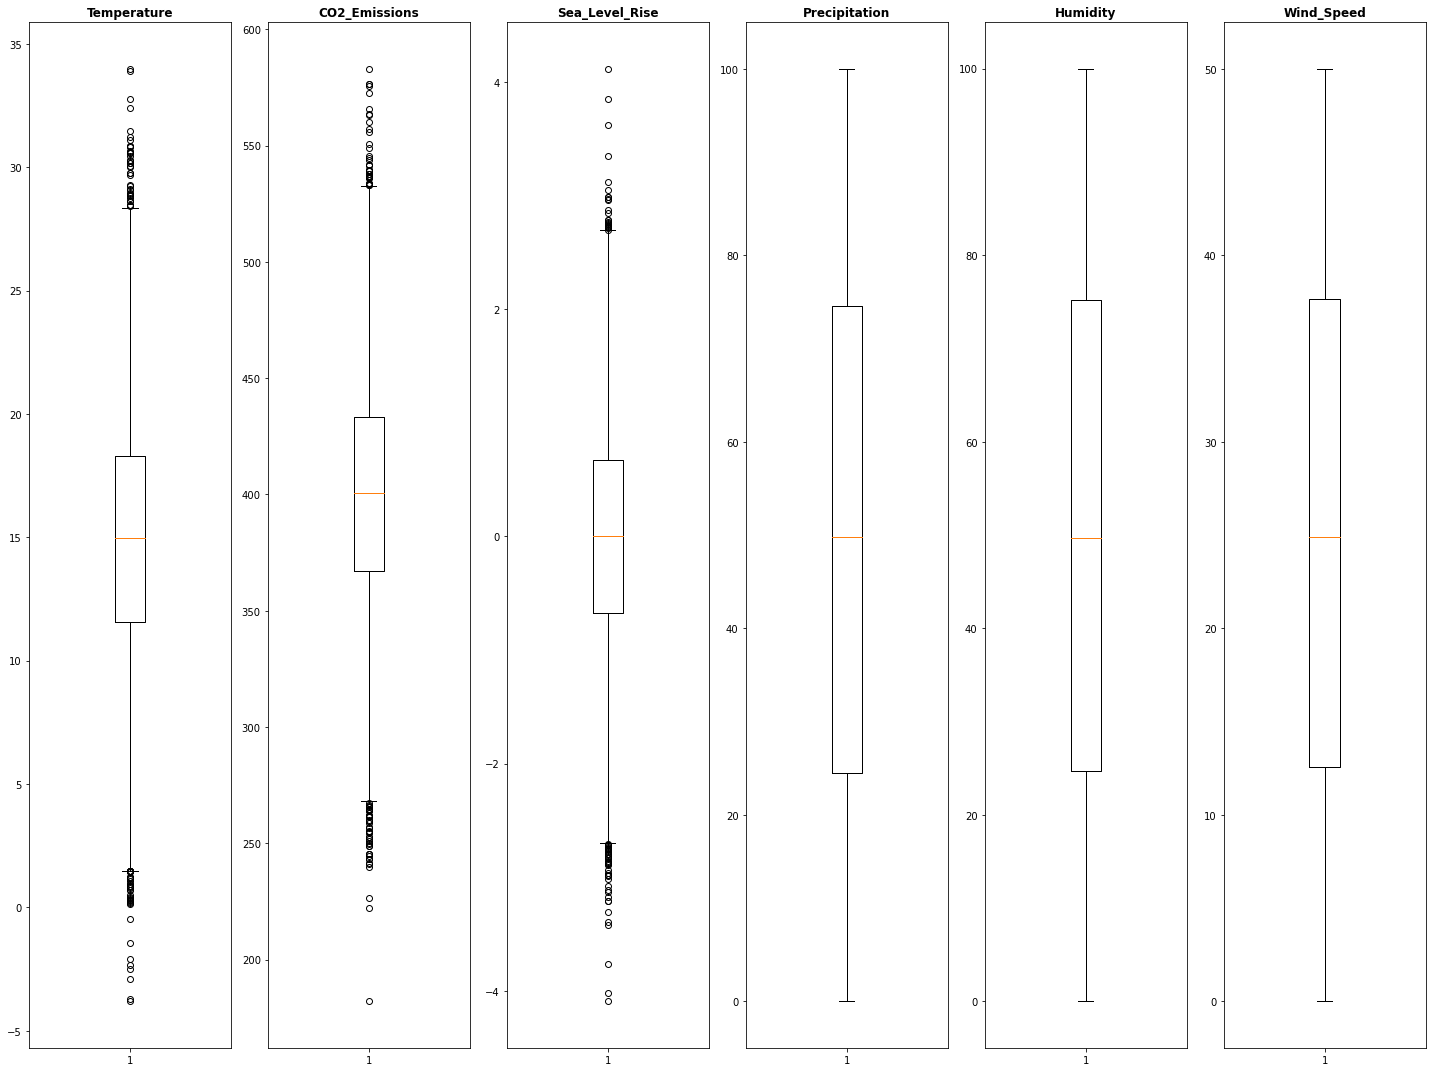

In [44]:
fig, axs = plt.subplots(1, len(numerical_df.columns), figsize = (20,15))

for i, ax in enumerate(axs.flat):
    ax.boxplot(numerical_df.iloc[:,i])
    ax.set_title(numerical_df.columns[i],fontweight = 'bold')
    ax.tick_params(axis='y')
    
plt.tight_layout()

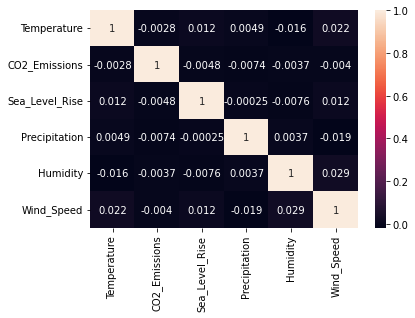

In [45]:
sns.heatmap(numerical_df.corr(), annot=True)

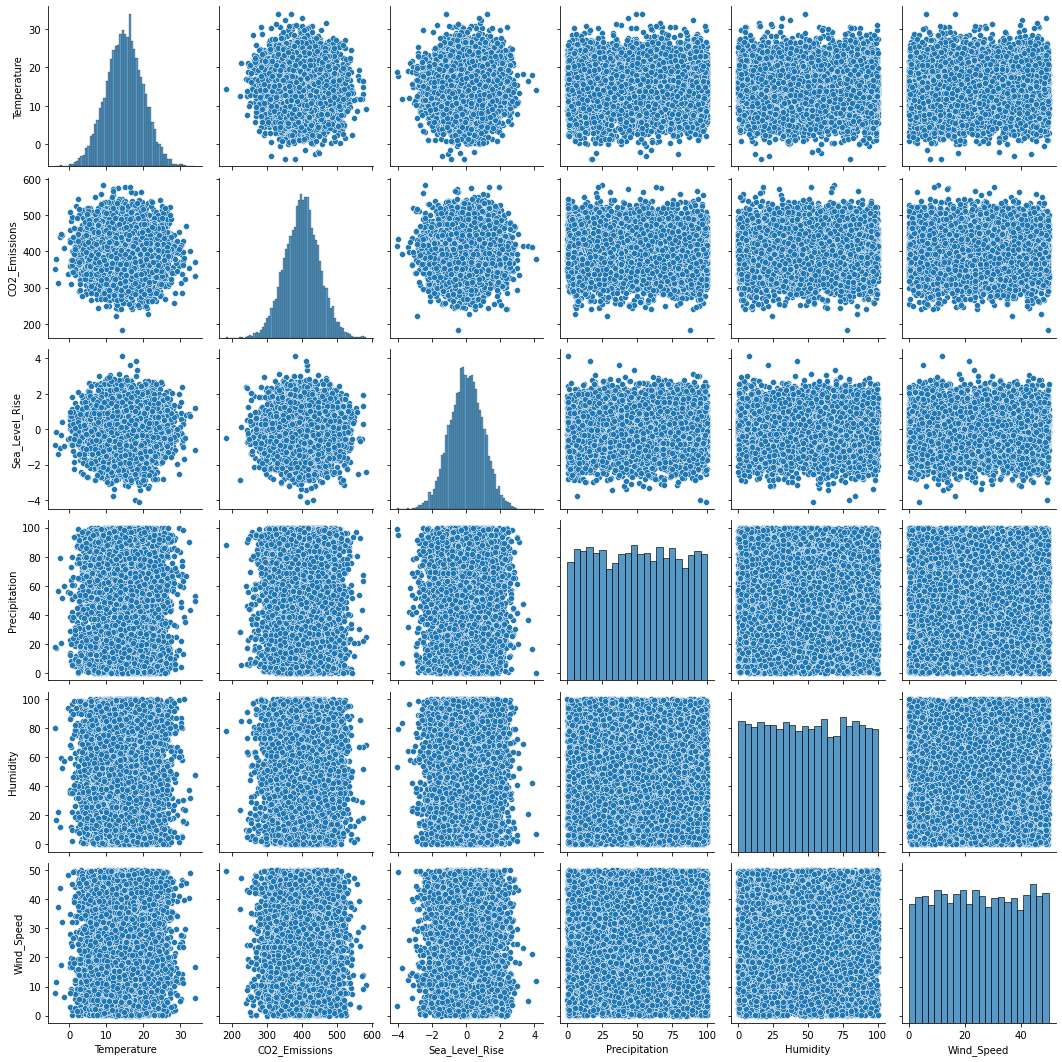

In [46]:
sns.pairplot(numerical_df)

In [47]:
max_vals_temp = cleaned_Climate_data_df.groupby('Country')['Temperature'].apply(lambda x: max(x))
max_temp = pd.DataFrame({'Country': max_vals_temp.index, 'Max Value': max_vals_temp.values})
top_50_temp = max_temp.sort_values('Max Value', ascending=False).head(50)

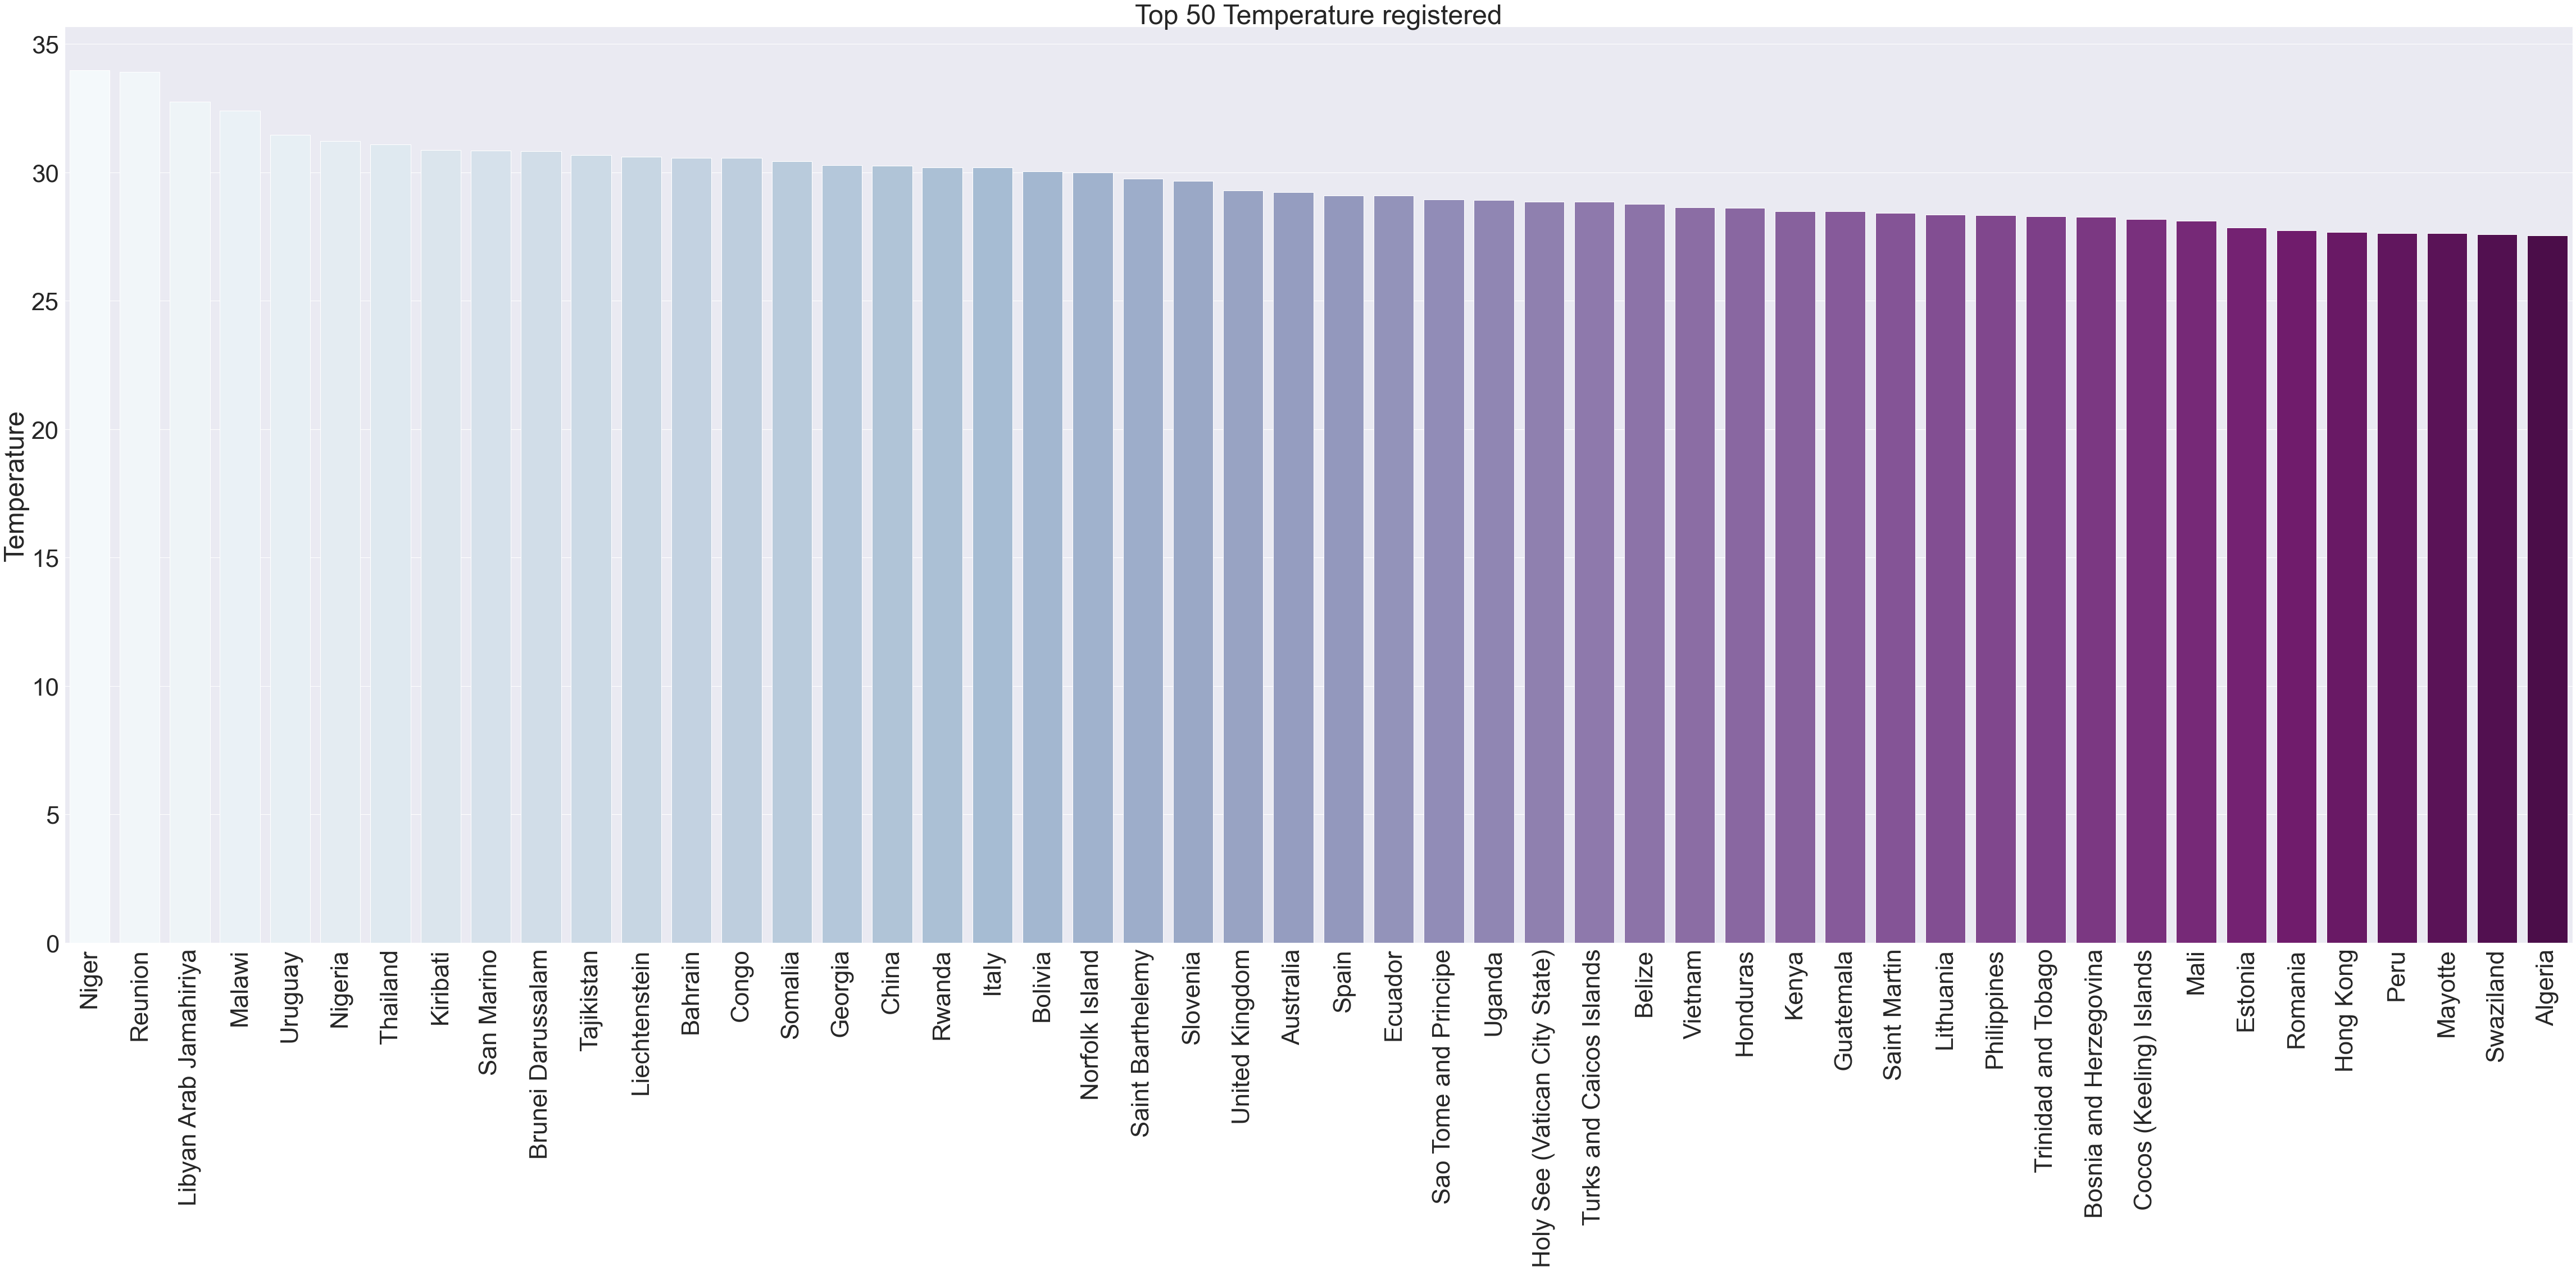

In [53]:
sns.barplot(x = 'Country', y = 'Max Value', data = top_50_temp, palette = "BuPu")
sns.set(rc={'figure.figsize':(80,30)})
sns.set(font_scale=4)
plt.xticks(rotation=90)
plt.ylabel('Temperature')
plt.xlabel(None)
plt.title('Top 50 Temperature registered')
plt.show()

In [49]:
max_vals_co2 = cleaned_Climate_data_df.groupby('Country')['CO2_Emissions'].apply(lambda x: max(x))
max_co2 = pd.DataFrame({'Country': max_vals_co2.index, 'Max Value': max_vals_co2.values})
top_50_co2 = max_co2.sort_values('Max Value', ascending=False).head(50)

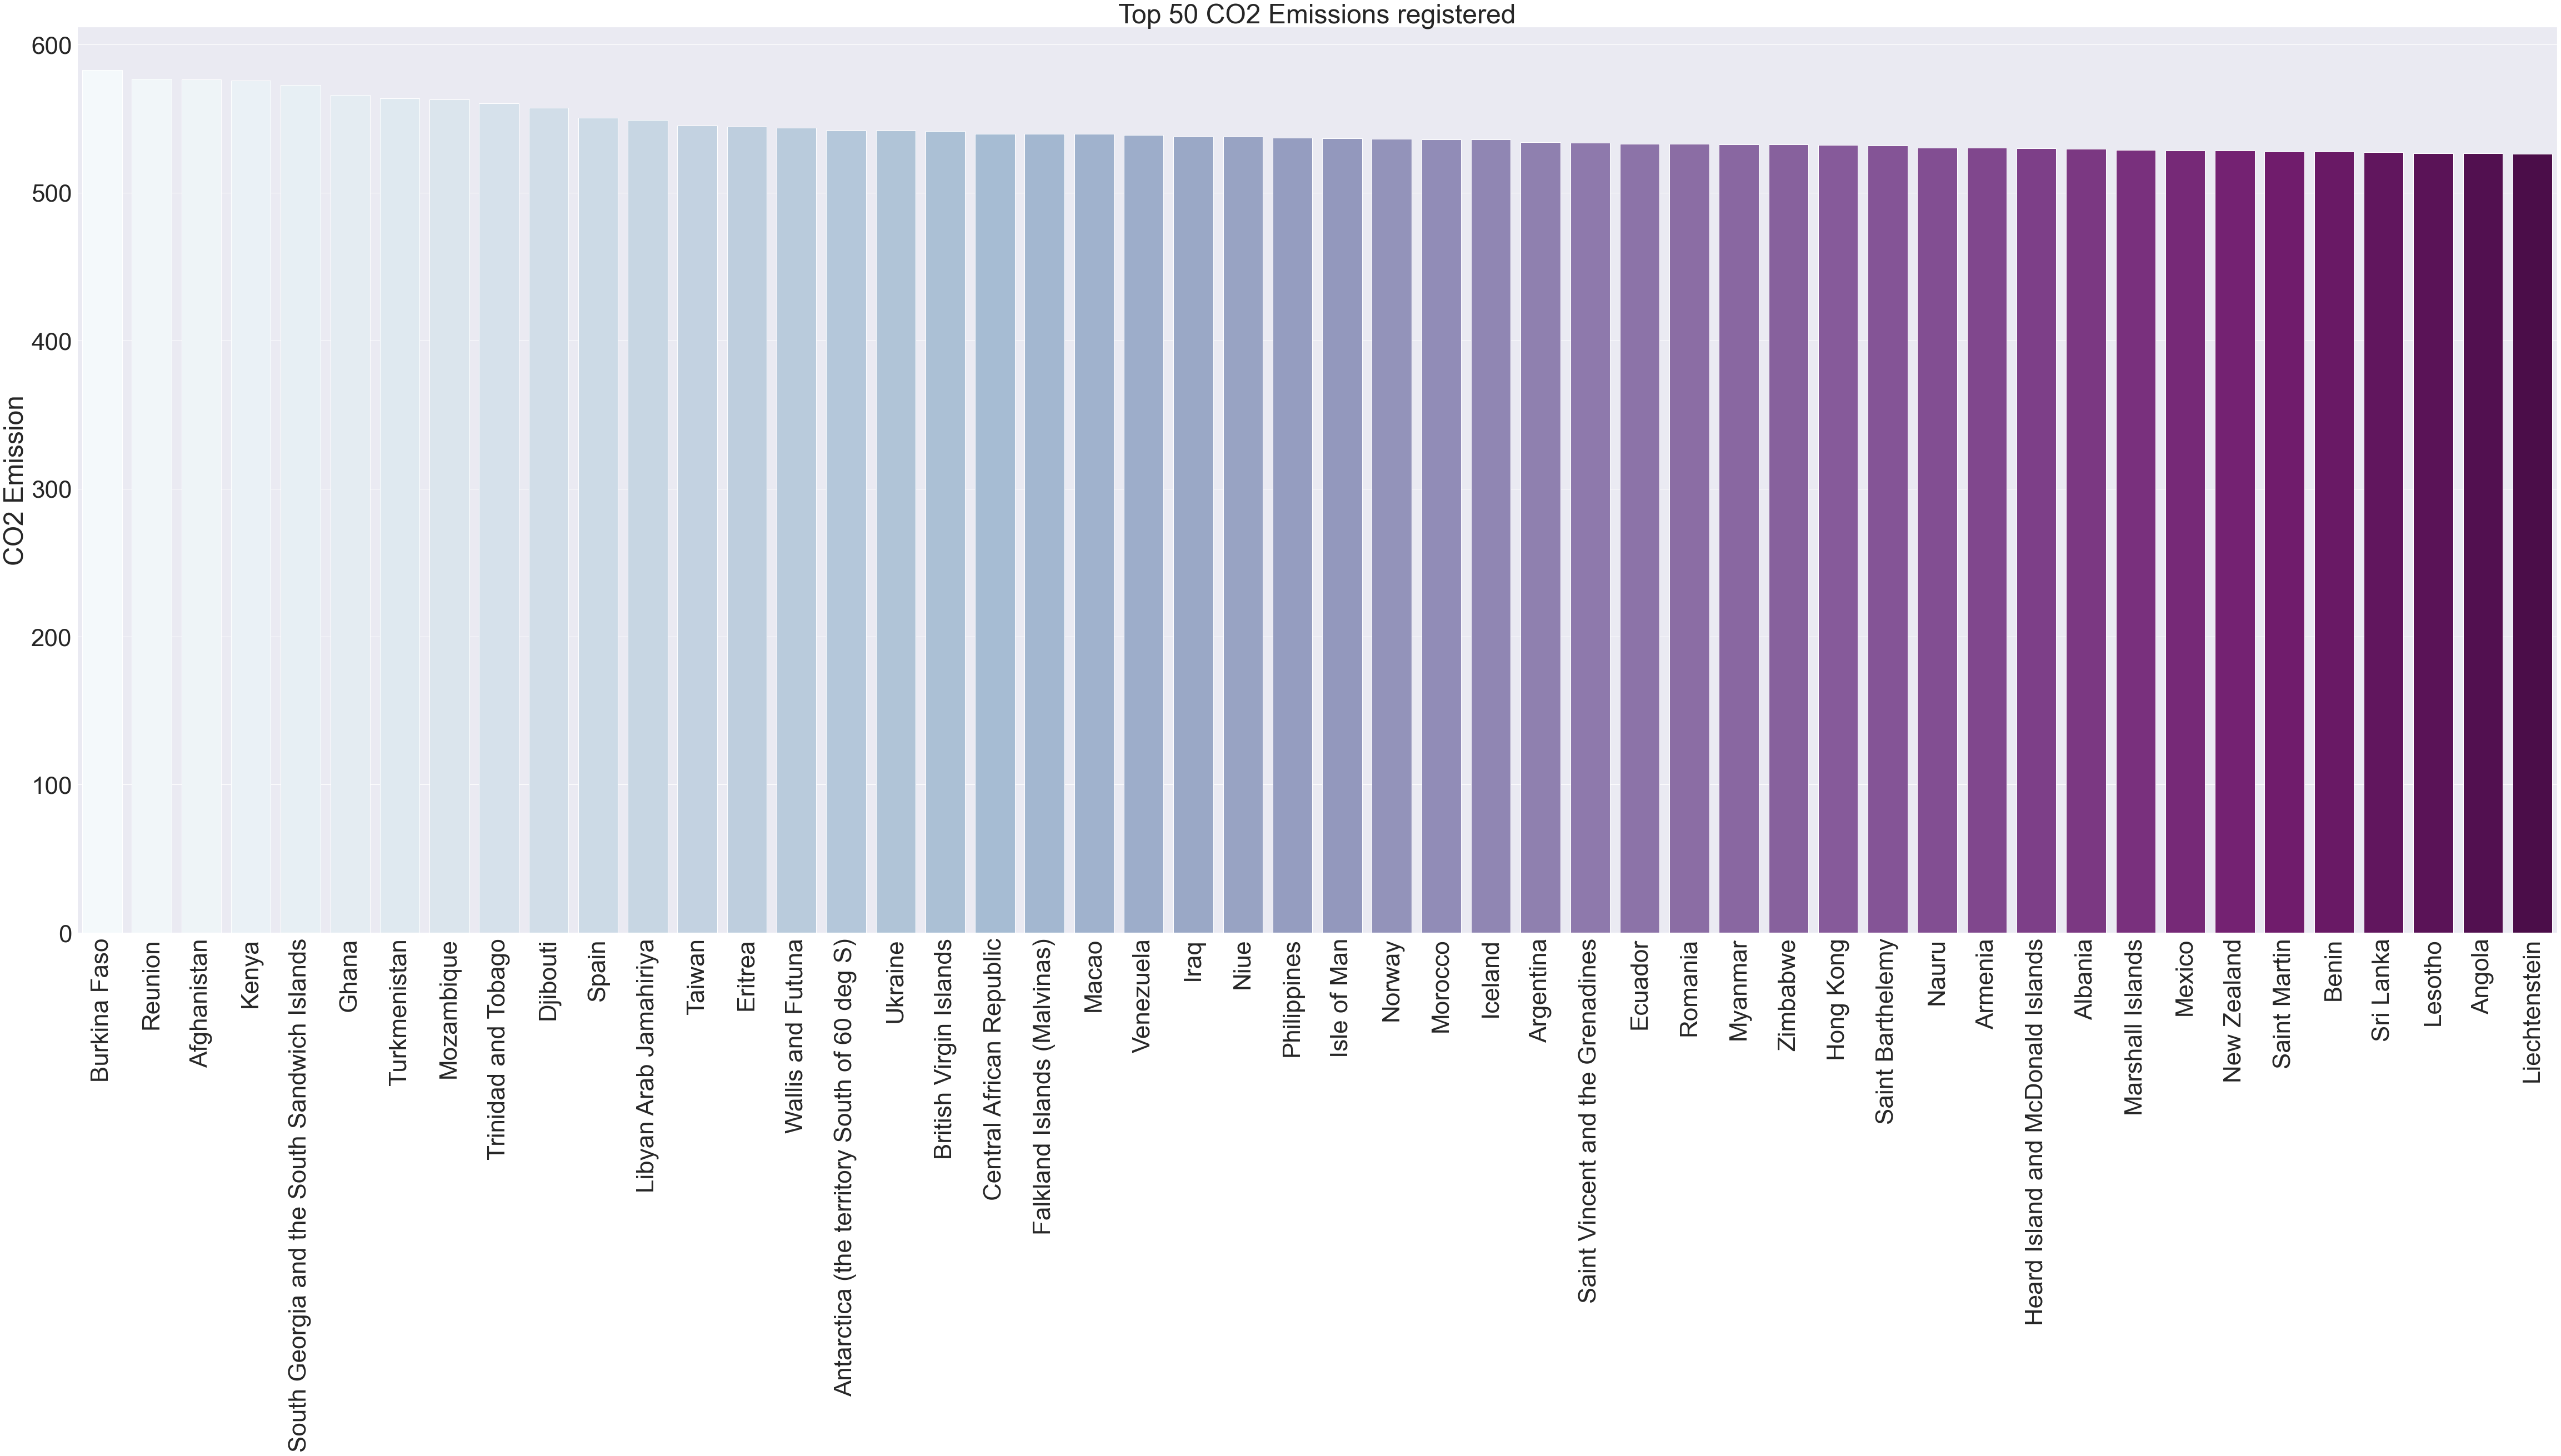

In [50]:
sns.barplot(x = 'Country', y = 'Max Value', data = top_50_co2, palette = "BuPu")
sns.set(rc={'figure.figsize':(80,30)})
sns.set(font_scale=4)
plt.xticks(rotation=90)
plt.ylabel('CO2 Emission')
plt.xlabel(None)
plt.title('Top 50 CO2 Emissions registered')
plt.show()

In [54]:
max_vals_sealvl = cleaned_Climate_data_df.groupby('Country')['Sea_Level_Rise'].apply(lambda x: max(x))
max_sealvl = pd.DataFrame({'Country': max_vals_sealvl.index, 'Max Value': max_vals_sealvl.values})
top_50_sealvl = max_sealvl.sort_values('Max Value', ascending=False).head(50)

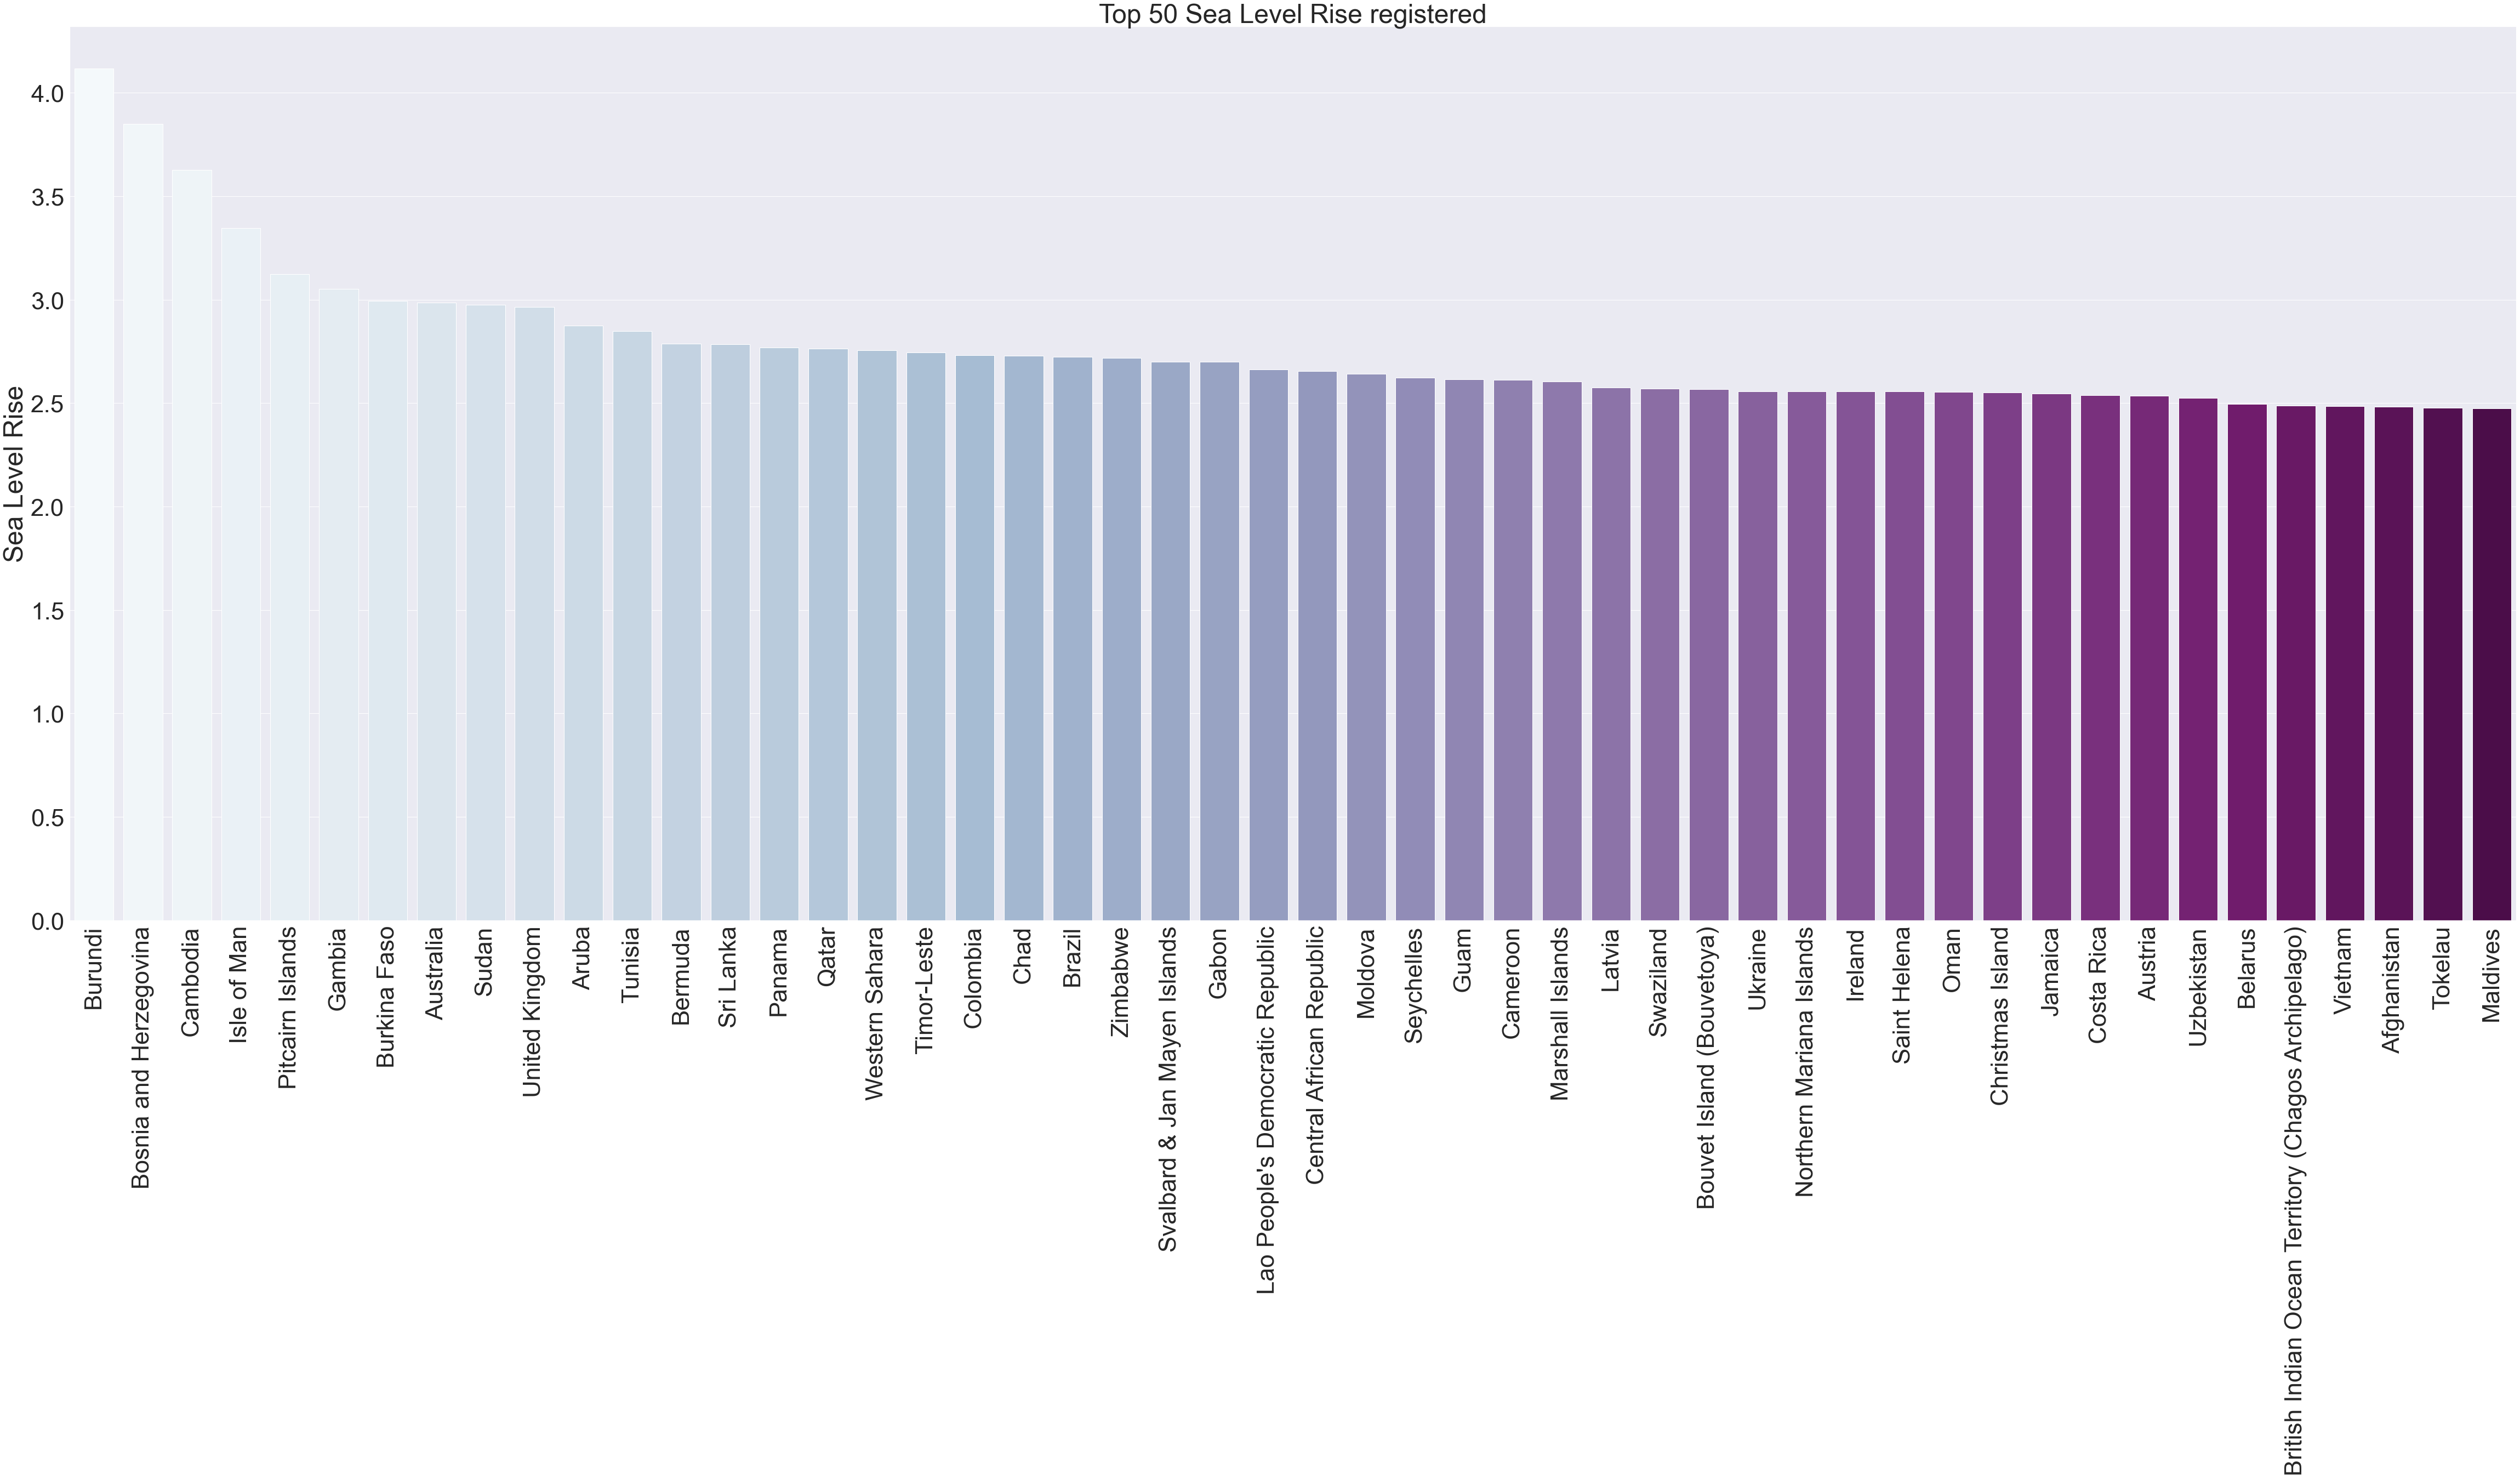

In [55]:
sns.barplot(x = 'Country', y = 'Max Value', data = top_50_sealvl, palette = "BuPu")
sns.set(rc={'figure.figsize':(80,30)})
sns.set(font_scale=4)
plt.xticks(rotation=90)
plt.ylabel('Sea Level Rise')
plt.xlabel(None)
plt.title('Top 50 Sea Level Rise registered')
plt.show()

In [56]:
max_vals_Precipitation = cleaned_Climate_data_df.groupby('Country')['Precipitation'].apply(lambda x: max(x))
max_Precipitation = pd.DataFrame({'Country': max_vals_Precipitation.index, 'Max Value': max_vals_Precipitation.values})
top_50_Precipitation = max_Precipitation.sort_values('Max Value', ascending=False).head(50)

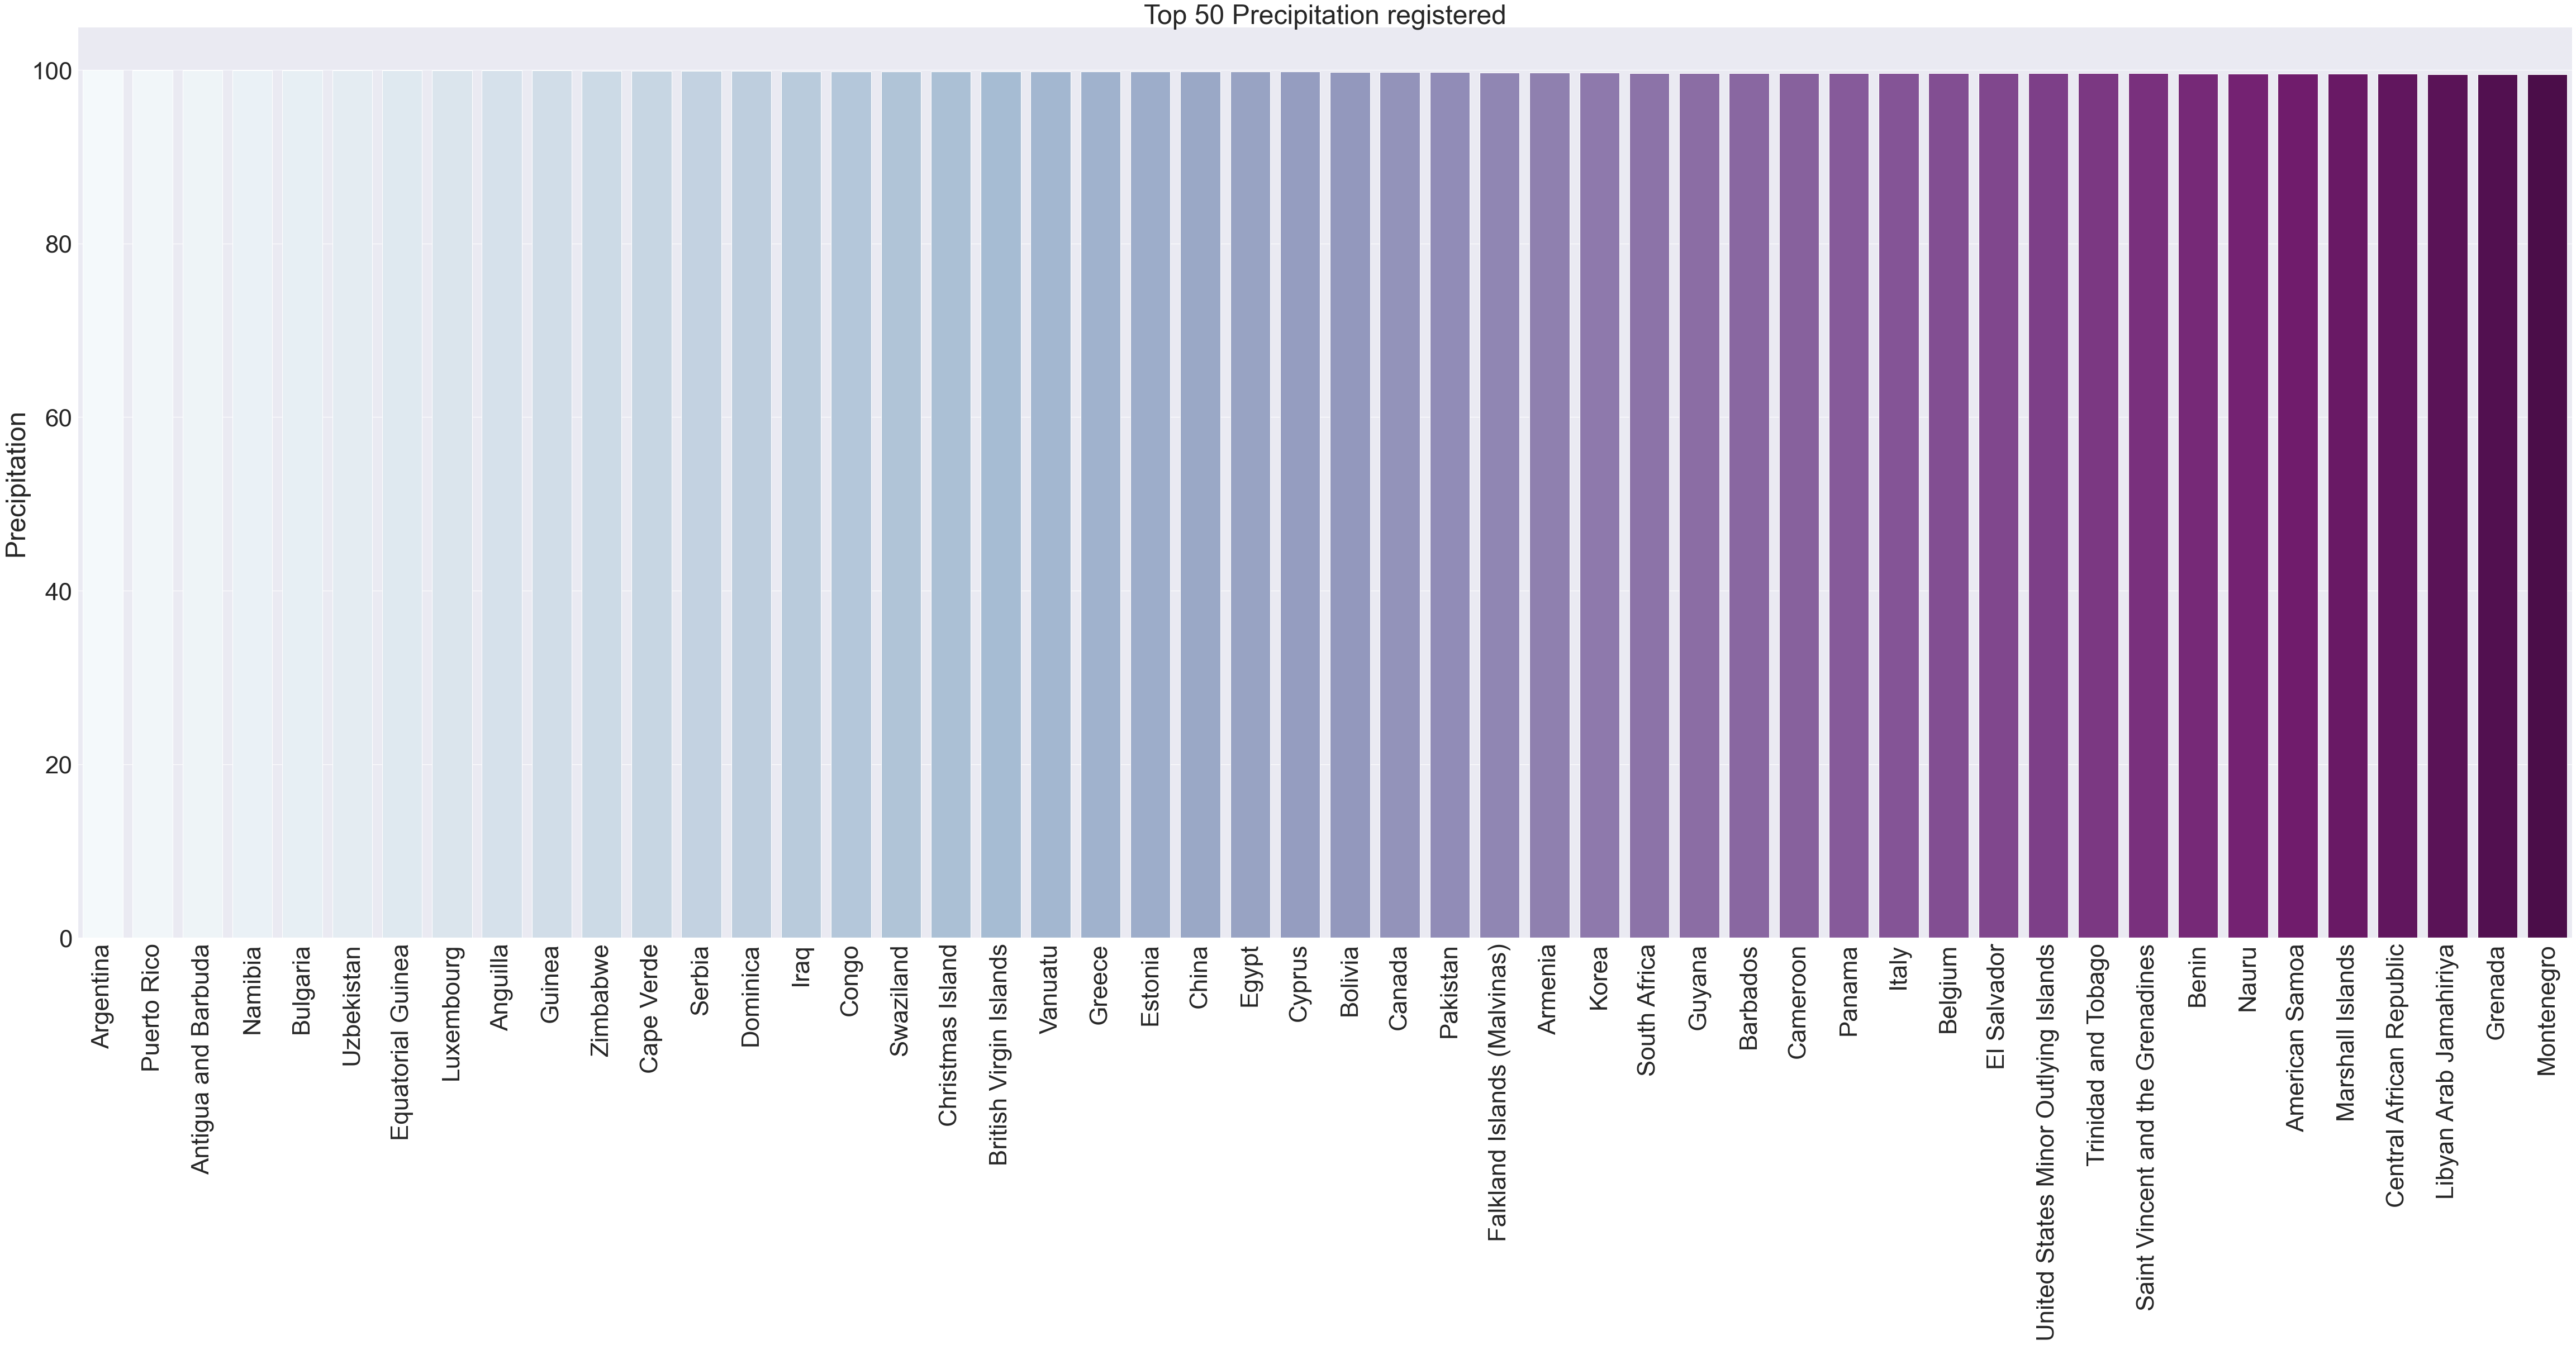

In [57]:
sns.barplot(x = 'Country', y = 'Max Value', data = top_50_Precipitation, palette = "BuPu")
sns.set(rc={'figure.figsize':(80,30)})
sns.set(font_scale=4)
plt.xticks(rotation=90)
plt.ylabel('Precipitation')
plt.xlabel(None)
plt.title('Top 50 Precipitation registered')
plt.show()

In [58]:
max_vals_Humidity = cleaned_Climate_data_df.groupby('Country')['Humidity'].apply(lambda x: max(x))
max_Humidity = pd.DataFrame({'Country': max_vals_Humidity.index, 'Max Value': max_vals_Humidity.values})
top_50_Humidity = max_Humidity.sort_values('Max Value', ascending=False).head(50)

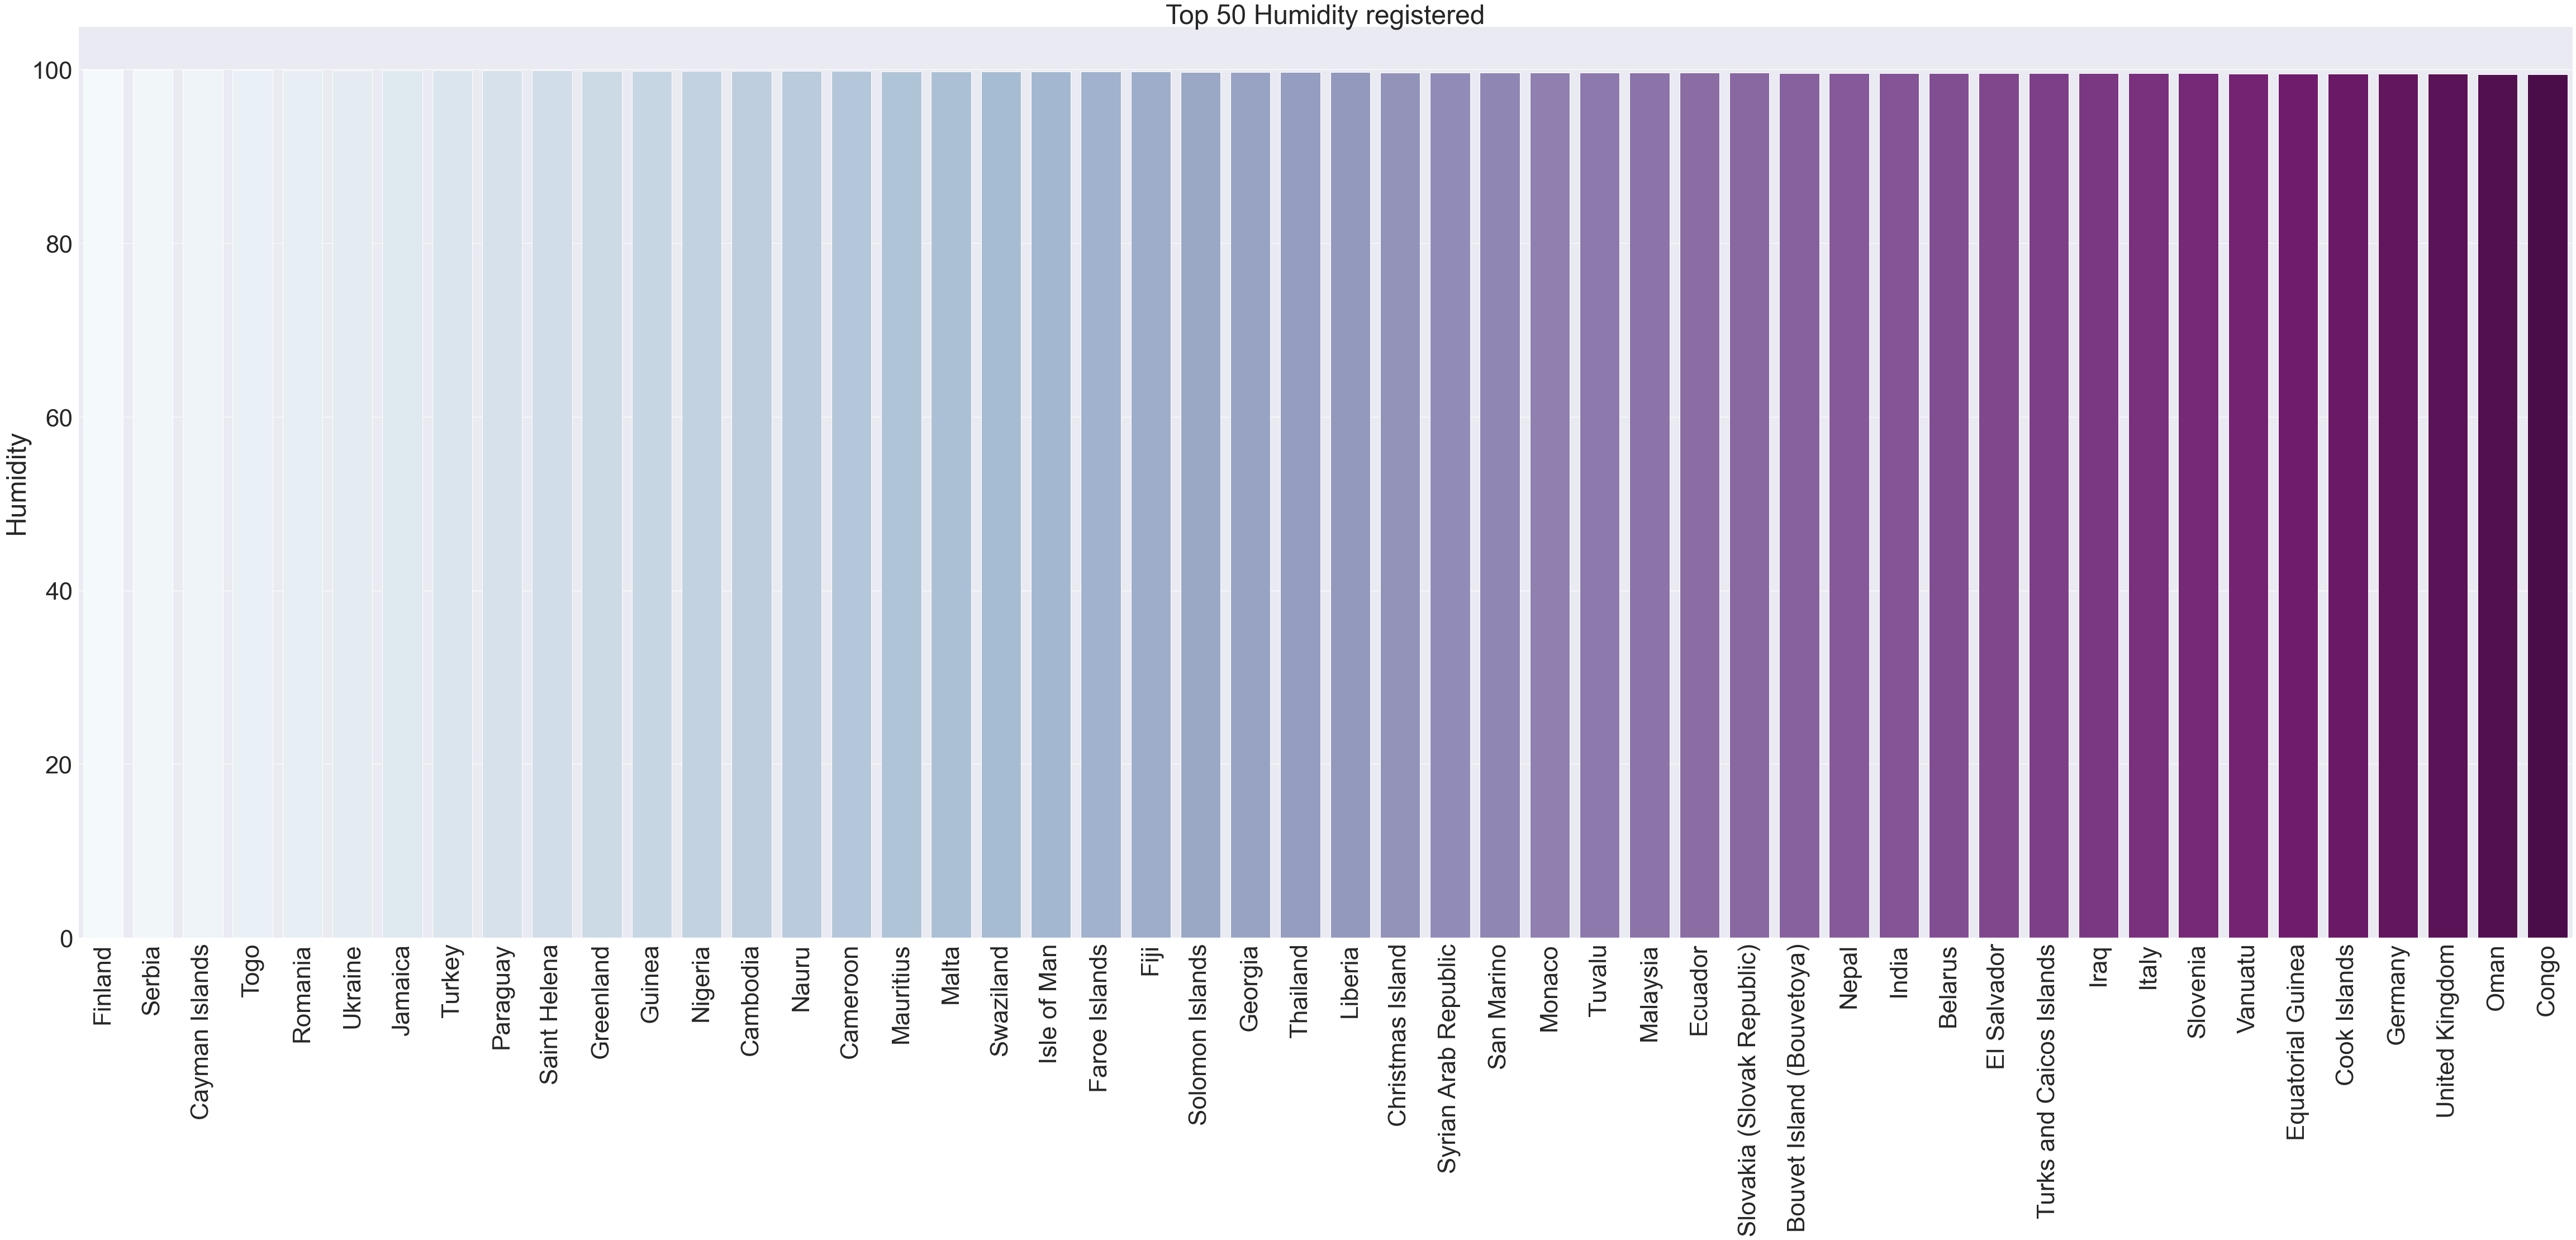

In [59]:
sns.barplot(x = 'Country', y = 'Max Value', data = top_50_Humidity, palette = "BuPu")
sns.set(rc={'figure.figsize':(80,30)})
sns.set(font_scale=4)
plt.xticks(rotation=90)
plt.ylabel('Humidity')
plt.xlabel(None)
plt.title('Top 50 Humidity registered')
plt.show()

In [60]:
max_vals_Wind_Speed = cleaned_Climate_data_df.groupby('Country')['Wind_Speed'].apply(lambda x: max(x))
max_Wind_Speed = pd.DataFrame({'Country': max_vals_Wind_Speed.index, 'Max Value': max_vals_Wind_Speed.values})
top_50_Wind_Speed = max_Wind_Speed.sort_values('Max Value', ascending=False).head(50)

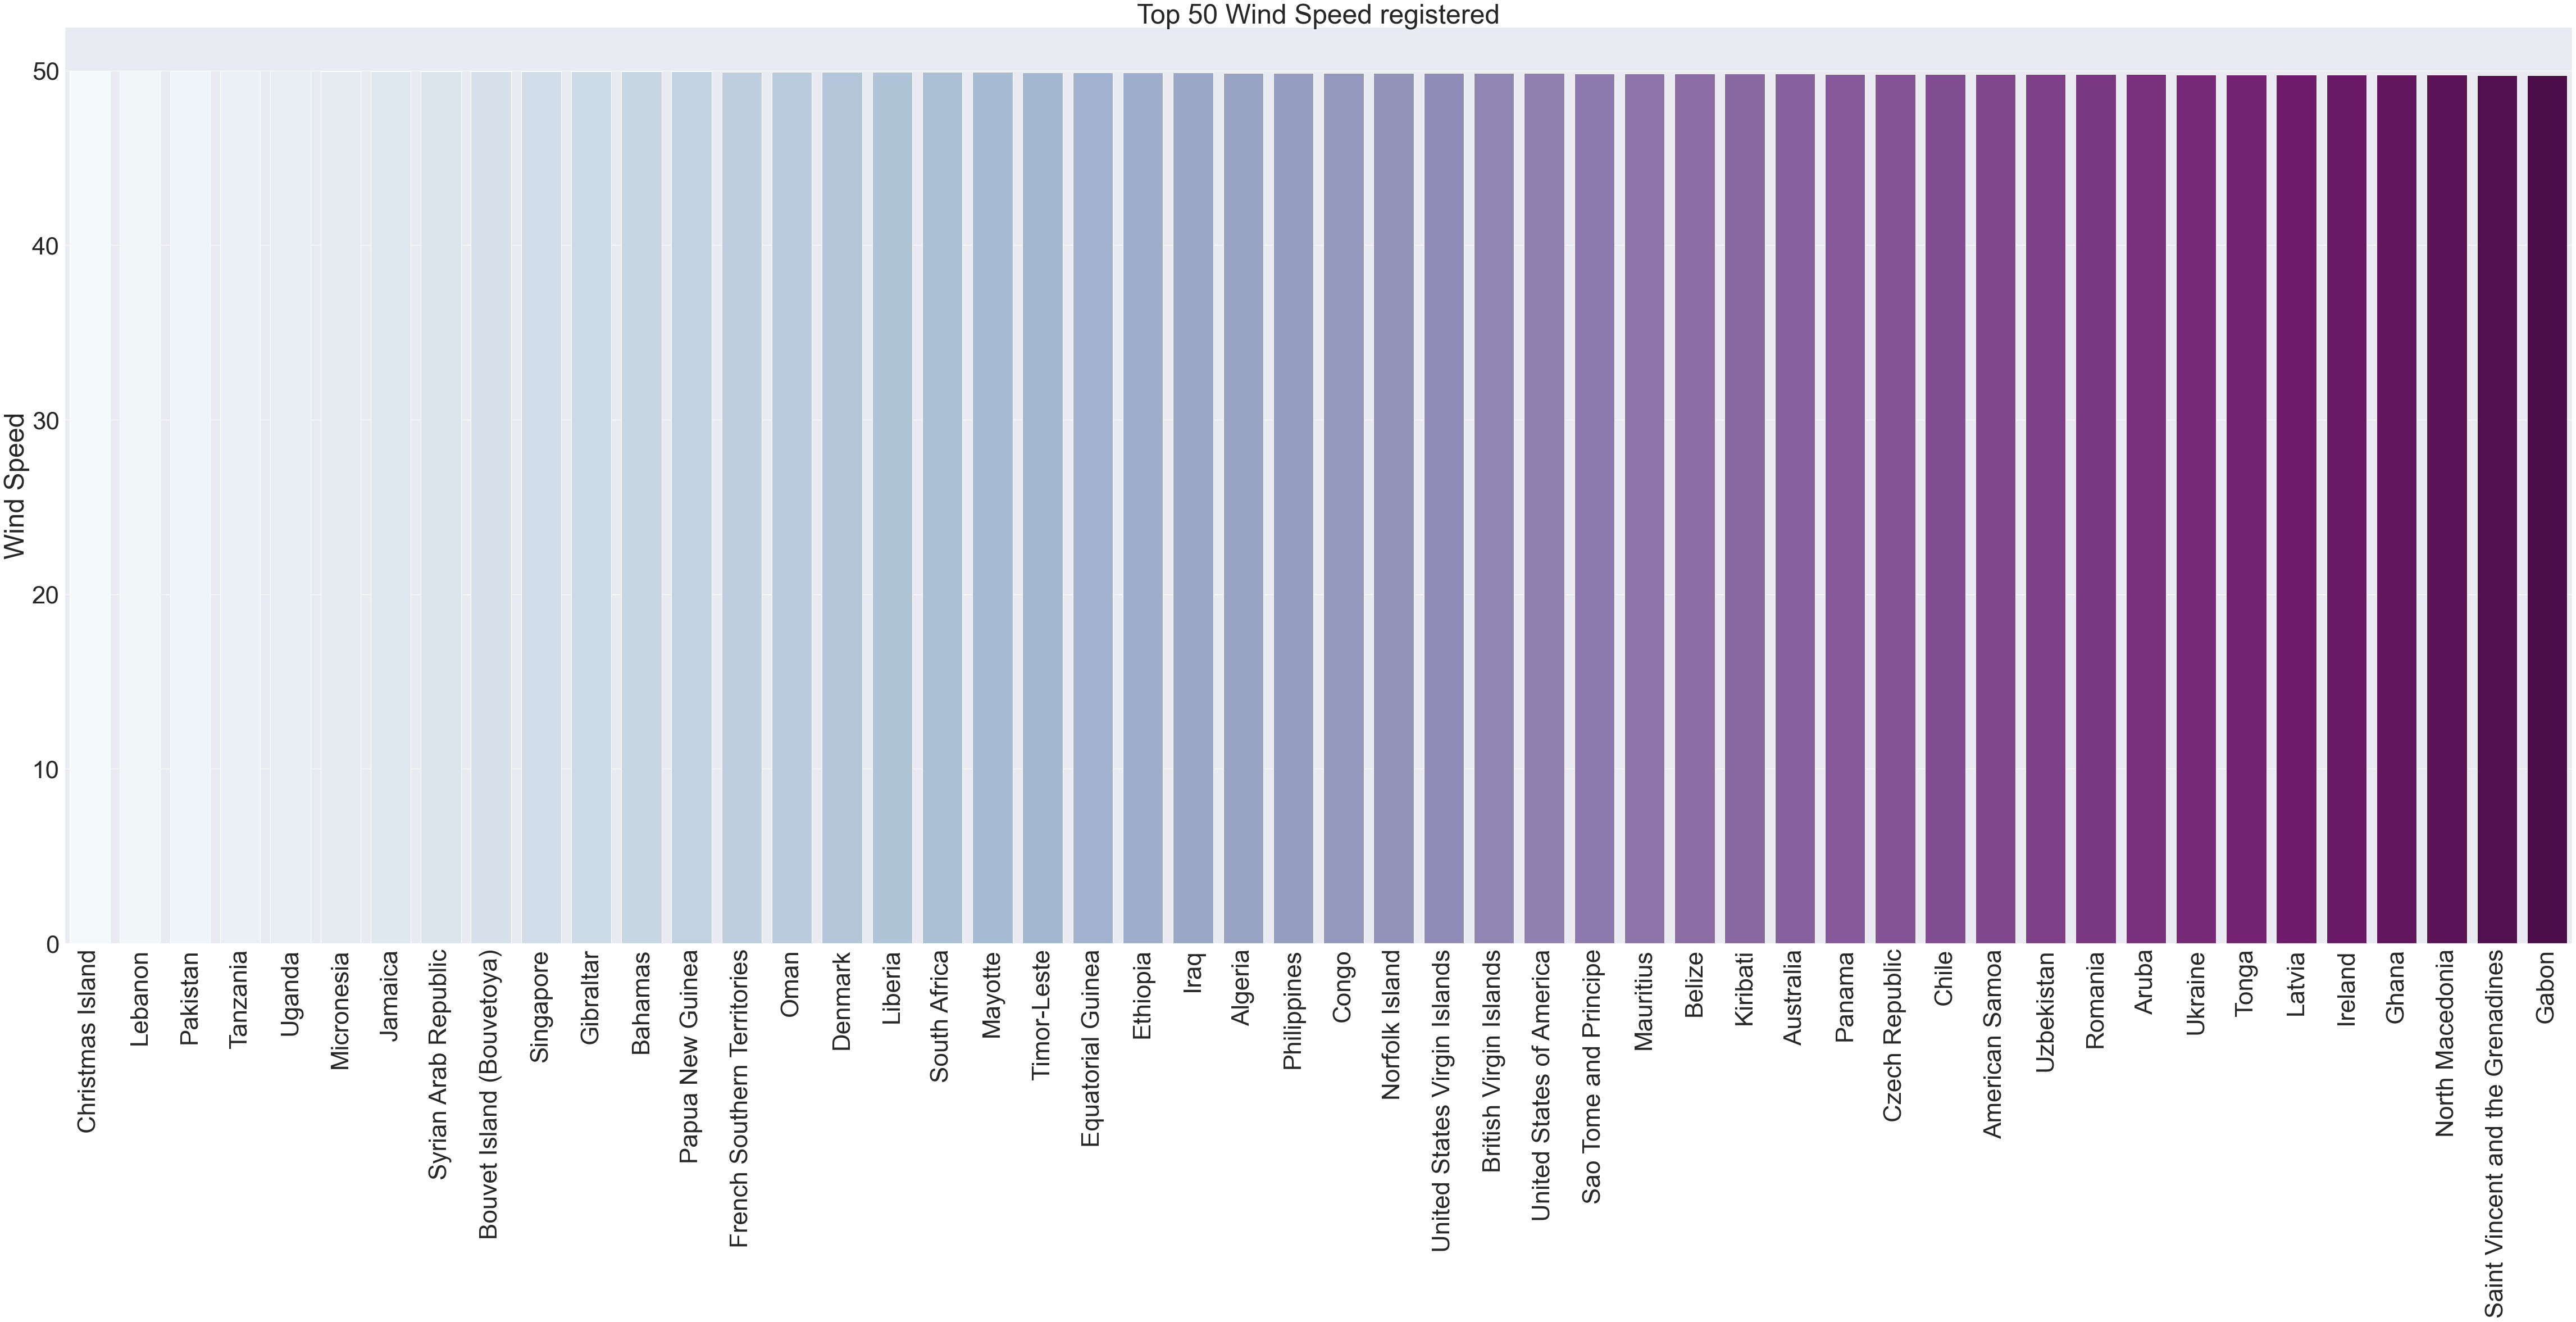

In [61]:
sns.barplot(x = 'Country', y = 'Max Value', data = top_50_Wind_Speed, palette = "BuPu")
sns.set(rc={'figure.figsize':(80,30)})
sns.set(font_scale=4)
plt.xticks(rotation=90)
plt.ylabel('Wind Speed')
plt.xlabel(None)
plt.title('Top 50 Wind Speed registered')
plt.show()

In [ ]:
cleaned_Climate_data_df.to_csv("Resources/cleaned_Climate_data.csv", encoding='utf8', index=False)

## DataSet 2

In [52]:
# File to Load (Remember to Change These)
Nat_disaster_data = Path("Resources/EMDAT_1900-2021_NatDis_WIP.xlsx")


# Read School and Student Data File and store into Pandas DataFrames
Nat_disaster_data_pd = pd.read_excel(Nat_disaster_data)

Nat_disaster_data_pd.columns


FileNotFoundError: [Errno 2] No such file or directory: 'Resources\\EMDAT_1900-2021_NatDis_WIP.xlsx'

In [ ]:
col_todrop = ['Disaster Subsubtype','Disaster Subgroup', 'Disaster Subtype', 'Disaster Subsubtype',  'No Injured', 'No Affected', \
              'No Homeless', 'Total Affected']
cleaned_Nat_disaster_data_pd = Nat_disaster_data_pd.drop(labels=col_todrop, axis=1)
cleaned_Nat_disaster_data_pd.info()

## Clean up